# A practical Guide to Feature Engineering in Python

Feature engineering is one of the most important skills needed in data science and machine learning. It has a major influence on the performance of machine learning models and even the quality of insights derived during exploratory data analysis (EDA).

In this article, we’re going to learn some important techniques and tools that will help you properly extract, prepare, and engineer features from your dataset.

https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8

Data from Kaggle:

https://www.kaggle.com/antfarol/car-sale-advertisements

https://www.kaggle.com/satadru5/car-sale-prediction

# 1. Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# Configuration
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


# 2. Common function

In [2]:
def Predictive_Model(X_train, y_train, X_test, y_test):
       
    # build model
    import statsmodels.api as sm
    X = sm.add_constant(X_train)
    results = sm.Logit(y_train, X).fit()
    
    # return result
    print(results.summary())
    
    # print Rsquare of train set and test sest
    reg = LogisticRegression(C=1e8)
    reg.fit(X_train, y_train)
    print('Train set score: ', reg.score(X_train, y_train))
    print('Test set score: ', reg.score(X_test, y_test))

In [3]:
# Distribution plot

def analyse_continuous(df,var,target):
    df = df.copy()
    # df[var] = df[var].fillna(df[var].median())
    plt.figure(figsize=(20,5))
       
    # histogram
    plt.subplot(131)
    sns.distplot(df[var], bins=30)
    #sns.distplot(df[var],hist=True, kde=True,kde_kws={'shade': True, 'linewidth': 3})
    plt.title('Histogram')    
    
    # Q-Q plot
    plt.subplot(132)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.ylabel('Quantiles')    
    
    # boxplot
    plt.subplot(133)
    sns.boxplot(x=df[var])
    plt.title('Boxplot')
          
    # skewness and kurtosis
    print('Skewness: %f' % df[var].skew())
    print('Kurtosis: %f' % df[var].kurt())
    plt.show()

In [4]:
def ModelEvaluation(X_train, y_train, X_test, y_test):
       
    # initialize models
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(kernel="linear")))
    models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    for name,model in models:
        print(name)
        model.fit(X_train, y_train)
        
        print('==========================================================')
        print('Train set')
        y_train_pred = model.predict(X_train)
        print('Accuracy: ', accuracy_score(y_train, list(y_train_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_train, list(y_train_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_train,list(y_train_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'True'
        cm_df.columns.name = 'Predicted'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_train, list(y_train_pred)))
  
        print('----------------------------------------------------------')
        print('Test set')
        y_test_pred = model.predict(X_test)
        print('Accuracy: ', accuracy_score(y_test, list(y_test_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_test, list(y_test_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_test,list(y_test_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'True'
        cm_df.columns.name = 'Predicted'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_test, list(y_test_pred)))
        print('==========================================================')
        

In [5]:
def Model_Selection(X_train, y_train, X_test, y_test):
    
    # initialize models
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(kernel="linear")))
    models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    # Test options and evaluation metric
    seed = 9
    scoring = 'accuracy'

    # evaluate each model in turn
    results = {}
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state = seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results[name] = cv_results
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [6]:
from sklearn.manifold import TSNE



def tsne_plot(X_train, y_train):
       
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(X_train)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y_train == 0), 0], X_t[np.where(y_train == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='No cancer')
    plt.scatter(X_t[np.where(y_train == 1), 0], X_t[np.where(y_train == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Colon cancer')

    plt.legend(loc='best');
    plt.show();
    
def tsne_plot_3D(X_train, y_train):
    from mpl_toolkits.mplot3d import Axes3D
       
    tsne = TSNE(n_components=3, random_state=0)
    X_t = tsne.fit_transform(X_train)

    fig = plt.figure(1, figsize=(7,7))
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    ax.scatter(X_t[:, 0], X_t[:, 1],X_t[:, 2],c=y_train, edgecolor="k", s=50, cmap='viridis')
    plt.title("3D plot", fontsize=14)
    
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.legend(loc='best');
    plt.show();

# 3. Loading the raw data

In [7]:
df = pd.read_csv('CarSale.csv')
org_df = df.copy()
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# 4. Data Exploration

## 4.1. Descriptive Statistics

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,4345,7,Volkswagen,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4173,NaN,NaN,NaN,19418.7,25584.2,600,6999,11500,21700,300000
Body,4345,6,sedan,1649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,4345,NaN,NaN,NaN,161.237,105.706,0,86,155,230,980
EngineV,4195,NaN,NaN,NaN,2.79073,5.06644,0.6,1.8,2.2,3,99.99
Engine Type,4345,4,Diesel,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Registration,4345,2,yes,3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,4345,NaN,NaN,NaN,2006.55,6.7191,1969,2003,2008,2012,2016
Model,4345,312,E-Class,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4.3. Categorize vars

In [9]:
target = ['Price']
print("\nTarget var: ", target)

text_vars = []

mixed_vars = []

## cat vars
cat_vars = [var for var in df.columns if df[var].dtypes == 'O' if var not in target]
print("\n========================================================================")
print("\nCategorical vars: ", cat_vars)
print('There are {} categorical variables'.format(len(cat_vars)))

one_level = [var for var in cat_vars if len(df[var].unique()) == 1 if var not in mixed_vars+text_vars]
print("\nOne level vars: ", one_level)
print('There are {} One level variables'.format(len(one_level)))

low_levels = [var for var in cat_vars if len(df[var].unique()) <= 30 if var not in mixed_vars+text_vars]
print("\nLow cardinality vars: ", low_levels)
print('There are {} Low cardinality variables'.format(len(low_levels)))

high_levels = [var for var in cat_vars if len(df[var].unique()) > 30 if var not in mixed_vars+text_vars]
print("\nHigh cardinality vars: ", high_levels)
print('There are {} High cardinality variables'.format(len(high_levels)))

print("\nMixed type vars: ", mixed_vars)
print('There are {} Mixed type  variables'.format(len(mixed_vars)))

datetime_vars = [var for var in df.columns if df[var].dtypes == '<M8[ns]']
print("\n========================================================================")
print("\nDateTime vars: ", datetime_vars)
print('There are {} DateTime variables'.format(len(datetime_vars)))

print("\n========================================================================")
print("\nText vars: ", text_vars)
print('There are {} Text variables'.format(len(text_vars)))

num_vars = [var for var in df.columns if df[var].dtypes != 'O' if var not in target + datetime_vars + text_vars]
print("\n========================================================================")
print("\nNumerical vars: ", num_vars)
print('\nThere are {} Numerical variables'.format(len(num_vars)))

dis_vars = [var for var in num_vars if len(df[var].unique()) < 20]
print("\nDiscrete vars: ", dis_vars)
print('There are {} Discrete variables'.format(len(dis_vars)))

cont_vars = [var for var in num_vars if var not in dis_vars]
print("\nContinous vars: ", cont_vars)
print('There are {} Continous variables'.format(len(cont_vars)))


Target var:  ['Price']


Categorical vars:  ['Brand', 'Body', 'Engine Type', 'Registration', 'Model']
There are 5 categorical variables

One level vars:  []
There are 0 One level variables

Low cardinality vars:  ['Brand', 'Body', 'Engine Type', 'Registration']
There are 4 Low cardinality variables

High cardinality vars:  ['Model']
There are 1 High cardinality variables

Mixed type vars:  []
There are 0 Mixed type  variables


DateTime vars:  []
There are 0 DateTime variables


Text vars:  []
There are 0 Text variables


Numerical vars:  ['Mileage', 'EngineV', 'Year']

There are 3 Numerical variables

Discrete vars:  []
There are 0 Discrete variables

Continous vars:  ['Mileage', 'EngineV', 'Year']
There are 3 Continous variables


## 4.4. Investigate target var

In [10]:
df = df[df.Price > 0]
df.shape

(4173, 9)

In [11]:
df['Class'] = 0
df.loc[df.Price > 15000, 'Class'] = 1
df = df.drop(['Price'],axis=1)

df[df.Class == 0].shape, df[df.Class == 1].shape

((2641, 9), (1532, 9))

## 4.5. Explore numerical vars

### 4.5.1. Data Overview

In [12]:
df[num_vars].head()

,Mileage,EngineV,Year
0,277,2.0,1991
1,427,2.9,1999
2,358,5.0,2003
3,240,4.2,2007
4,120,2.0,2011


### 4.5.2. Explore distribution

#### Distribution of Independent Variable

Skewness: 0.829057
Kurtosis: 2.709509


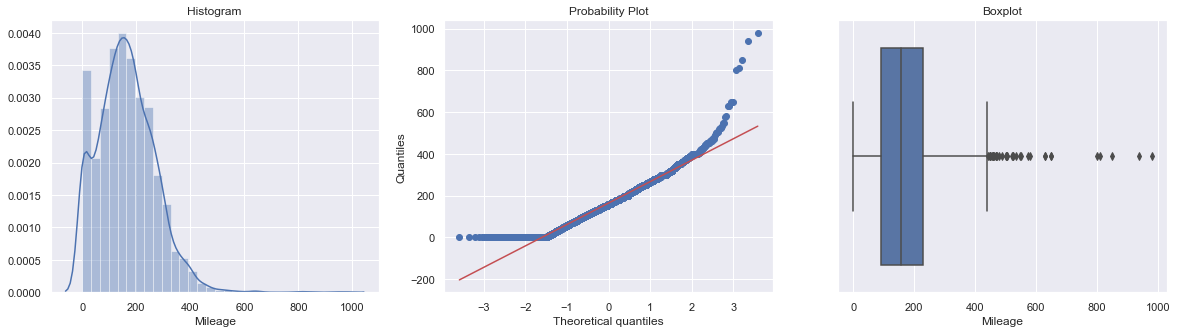

Skewness: 17.154962
Kurtosis: 316.181652


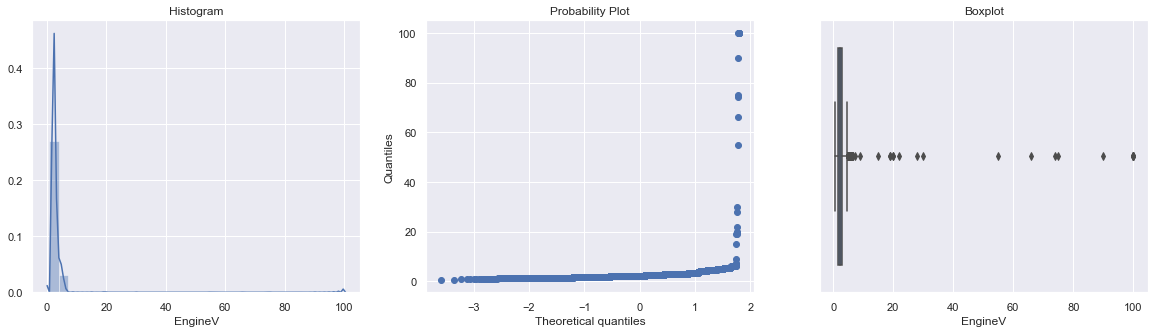

Skewness: -0.950663
Kurtosis: 0.963271


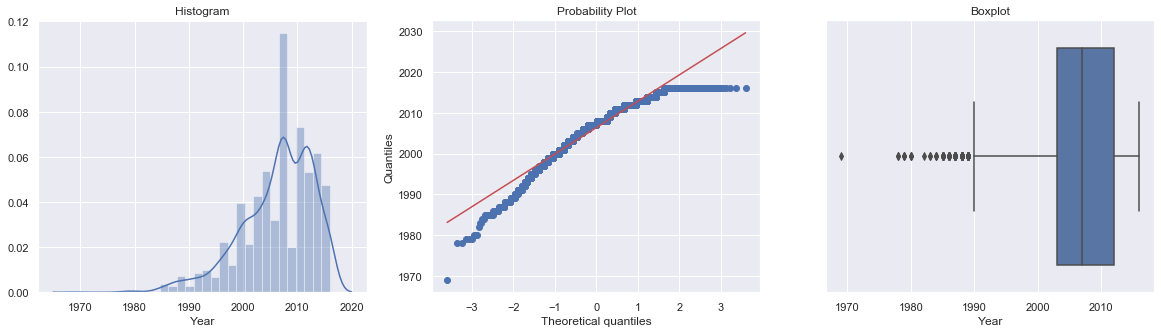

In [207]:
for var in cont_vars:
    analyse_continuous(df,var,target)

#### Bivariate analysis

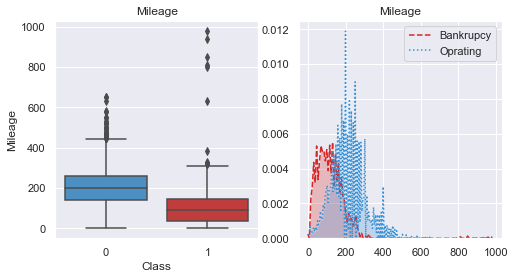

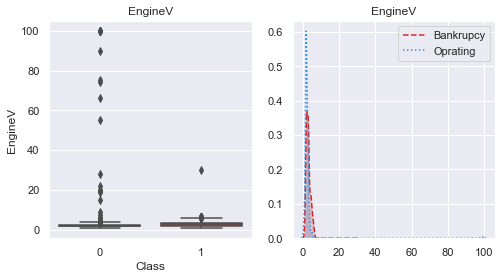

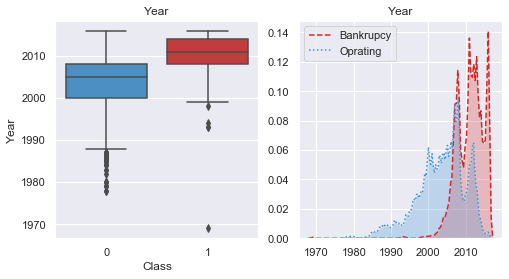

In [208]:
colors = ['#3791D7','#D72626']

for column in cont_vars:    
    plt.figure(figsize=[8,4])
    plt.subplot(121)
    sns.boxplot(x='Class', y=column,data=df,palette=colors)
    plt.title(column, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(df[df.Class==1][column], bw = 0.4, label = "Bankrupcy", shade=True, color="#D72626", linestyle="--")
    sns.kdeplot(df[df.Class==0][column], bw = 0.4, label = "Oprating", shade=True, color= "#3791D7", linestyle=":")
    plt.title(column, fontsize=12)
    plt.show()

#### Statistics test

In [212]:
import scipy


ttest_df = pd.DataFrame(columns = ['Feature','t-stats','p-value'])
ttest_df['Feature'] = cont_vars

df0 = df[df['Class'] == 0]
df1 = df[df['Class'] == 1]

for var in num_vars:
    result = scipy.stats.ttest_ind(df0[df0[var].isnull() == False][var], df1[df1[var].isnull() == False][var])
    ttest_df.loc[ttest_df['Feature'] == var,'t-stats'] = result[0]
    ttest_df.loc[ttest_df['Feature'] == var,'p-value'] = result[1]
  
ttest_df

,Feature,t-stats,p-value
0,Mileage,35.6858,1.20488e-243
1,EngineV,-2.45385,0.0141755
2,Year,-41.2267,0


In [213]:
corr_df = df[cont_vars + ['Class']].corr()
corr_df.head()

,Mileage,EngineV,Year,Class
Mileage,1.000000,0.024935,-0.657501,-0.483635
EngineV,0.024935,1.000000,-0.030321,0.038659
Year,-0.657501,-0.030321,1.000000,0.538066
Class,-0.483635,0.038659,0.538066,1.000000


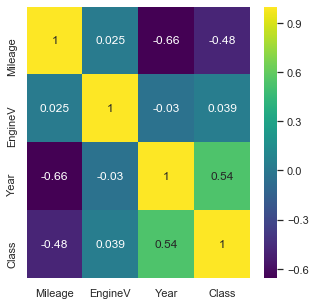

In [214]:
# correlation matrix
plt.figure(figsize = (5,5))
sns.heatmap(corr_df, annot = True, cmap='viridis')
plt.show()

## 4.6. Explore categorical vars

## 4.7. Summary

# 5. Data Cleaning

# 6. Data Driven Story

# 4. Separate train and test set

In [13]:
# Separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(df, df.Class, test_size=0.2, random_state=0, stratify = df.Class)
X_train.shape, X_test.shape

((3338, 9), (835, 9))

In [14]:
print(y_train.sum()/y_train.count())
print(y_test.sum()/y_test.count())

0.3669862192929898
0.36766467065868264


#### backup data before preprocessing

In [15]:
X_train_bk = X_train.copy()
X_test_bk = X_test.copy()

# 7. Data Preprocessing and Engineering

## 7.1. Engineering numerical vars

### 7.1.1. Dealing with missing values

#### Check missing data

In [16]:
miss_val_df = pd.DataFrame(X_train[cont_vars].isnull().sum(),columns=['Count'])
miss_val_df['Percentage'] = 100 * X_train[cont_vars].isnull().sum()/len(df[cont_vars])
miss_val_df = miss_val_df.sort_values('Percentage', ascending=False)
miss_val_df[miss_val_df.Percentage > 0]

,Count,Percentage
EngineV,121,2.899593


In [17]:
var_with_na = [var for var in miss_val_df[miss_val_df.Percentage > 0].index]
var_with_na

['EngineV']

Class


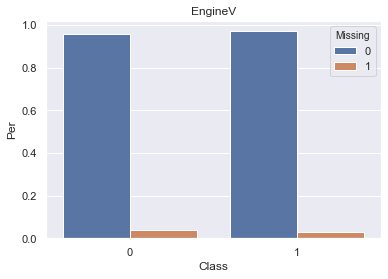

In [18]:
def analyze_na_values(df, var, target):
    tmp_df = df.copy()
    print(target)
    
    # Make a variable that indicates 1 if the observation was missing or 0 otherwise
    tmp_df['Missing'] = np.where(df[var].isnull(),1,0)
    
    # Calculate the mean Price where the information is missing or present
    tmp_df =  pd.DataFrame(tmp_df.groupby([target,'Missing'])[target].count())
    tmp_df.columns = ['Count']
    tmp_df = tmp_df.reset_index()
    
    
    if(len(tmp_df[tmp_df[target] == 0] == 1)):
        tmp_df= tmp_df.append({target:0,'Missing':1,'Count':0}, ignore_index=True)

    if(len(tmp_df[tmp_df[target] == 1] == 1)):
        tmp_df= tmp_df.append({target:1,'Missing':1,'Count':0}, ignore_index=True)

    tmp_df.loc[0,'Per']= tmp_df.loc[0,'Count']/(tmp_df.loc[0:1,'Count'].sum())
    tmp_df.loc[1,'Per']= tmp_df.loc[1,'Count']/(tmp_df.loc[0:1,'Count'].sum())
    tmp_df.loc[2,'Per']= tmp_df.loc[2,'Count']/(tmp_df.loc[2:3,'Count'].sum())
    tmp_df.loc[3,'Per']= tmp_df.loc[3,'Count']/(tmp_df.loc[2:3,'Count'].sum())
    sns.barplot(x=target, y = 'Per', data=tmp_df, hue='Missing')
    plt.title(var)
    plt.show()
    
for var in var_with_na:
    analyze_na_values(X_train, var, 'Class')

#### Imputation 1: Complate Case Analysis

In [19]:
X_train = X_train_bk.copy()
X_test = X_test_bk.copy()

X_train = X_train.dropna(axis=0)
X_test = X_test.dropna(axis=0)

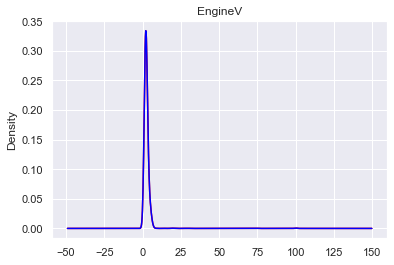

In [20]:
for var in var_with_na:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # original data
    X_train[var].plot.density(color='red')
    # data after cca
    X_train[var].plot.density(color='blue')
    plt.title(var)

As we can see from the above plots, the distribution of the selected numerical variables in the original and complete case dataset is very similar, which is what we expect from CCA if data is missing at random and only for a small proportion of the observations

In [21]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class
cont_vars = ['Mileage', 'EngineV', 'Year']

Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.817521 (0.020144)
SVC: 0.771207 (0.025074)
LSVC: 0.757853 (0.026299)
LR: 0.757854 (0.030396)
DT: 0.867561 (0.023942)
GNB: 0.722402 (0.025888)
RF: 0.884967 (0.020728)
GB: 0.897101 (0.023216)
LGB: 0.889635 (0.019211)
ADA: 0.890886 (0.024037)
QDA: 0.723342 (0.032649)
NN: 0.714641 (0.055483)
XGB: 0.896475 (0.024322)


In [22]:
Predictive_Model(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

Optimization terminated successfully.
         Current function value: 0.439871
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 3217
Model:                          Logit   Df Residuals:                     3213
Method:                           MLE   Df Model:                            3
Date:                Wed, 30 Sep 2020   Pseudo R-squ.:                  0.3323
Time:                        07:24:05   Log-Likelihood:                -1415.1
converged:                       True   LL-Null:                       -2119.2
Covariance Type:            nonrobust   LLR p-value:                4.858e-305
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -500.6377     30.755    -16.278      0.000    -560.917    -440.359
Mileage       -0.0064      0.

#### Imputation 2: Mean or Median

In [23]:
X_train = X_train_bk.copy()
X_test = X_test_bk.copy()

for var in var_with_na:
    X_train[var+'_mean'] = X_train[var].fillna(X_train[var].mean())
    X_train[var+'_median'] = X_train[var].fillna(X_train[var].median())
    
    X_test[var+'_mean'] = X_test[var].fillna(X_test[var].mean())
    X_test[var+'_median'] = X_train[var].fillna(X_test[var].median())

In [24]:
X_train.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,EngineV_mean,EngineV_median
596,BMW,other,136,NaN,Petrol,yes,2008,523,1,2.726149,2.2
265,BMW,sedan,237,3.0,Diesel,yes,2003,530,0,3.000000,3.0
405,Renault,vagon,170,1.5,Diesel,yes,2004,Kangoo,0,1.500000,1.5
1291,Toyota,crossover,40,2.7,Petrol,yes,2011,Land Cruiser Prado,1,2.700000,2.7
4266,Renault,van,285,1.9,Diesel,yes,2002,Trafic,0,1.900000,1.9


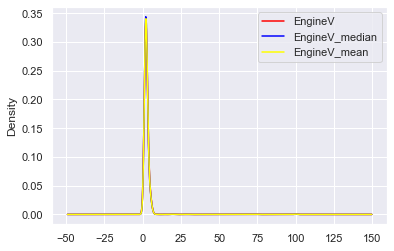

In [25]:
for var in var_with_na:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # original variable distribution
    X_train[var].plot(kind='kde', ax=ax, color = 'red')  
    # variable imputed with the median
    X_train[var+'_median'].plot(kind='kde', ax=ax, color='blue')
    # variable imputed with the mean
    X_train[var+'_mean'].plot(kind='kde', ax=ax, color='yellow')
    # add legends
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

In [26]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class
cont_vars = ['Mileage', 'EngineV_median', 'Year']

Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.819944 (0.018517)
SVC: 0.777115 (0.021552)
LSVC: 0.757042 (0.024931)
LR: 0.757640 (0.026557)
DT: 0.858580 (0.021051)
GNB: 0.719276 (0.026944)
RF: 0.881352 (0.017484)
GB: 0.893938 (0.023525)
LGB: 0.890040 (0.020768)
ADA: 0.890350 (0.021631)
QDA: 0.722575 (0.033711)
NN: 0.659650 (0.072409)
XGB: 0.894538 (0.022573)


In [27]:
cont_vars = ['Mileage', 'EngineV_mean', 'Year']

Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.818445 (0.018025)
SVC: 0.776220 (0.022732)
LSVC: 0.757042 (0.024931)
LR: 0.758239 (0.026570)
DT: 0.863372 (0.021034)
GNB: 0.719875 (0.026349)
RF: 0.878953 (0.020914)
GB: 0.895440 (0.022857)
LGB: 0.889744 (0.020769)
ADA: 0.885257 (0.025502)
QDA: 0.724072 (0.033831)
NN: 0.629745 (0.109943)
XGB: 0.894541 (0.022638)


if data is missing at random and only for a small proportion of the observations, then it is fair to assume that the missing values, are most likely very close to the value of the mean or median of the distribution, as these represent the most frequent/average observation

#### Imputation 3: Filling NA with random value

In [28]:
X_train = X_train_bk.copy()
X_test = X_test_bk.copy()

for var in var_with_na:
    random_sample_train = X_train[var].dropna().sample(X_train[var].isnull().sum(), random_state=0)
    random_sample_train.index = X_train[X_train[var].isnull()].index
    
    random_sample_test = X_test[var].dropna().sample(X_test[var].isnull().sum(), random_state=0)
    random_sample_test.index = X_test[X_test[var].isnull()].index
    
    # replace the NA in the newly created variable
    X_train[var+'_random'] = X_train[var].copy()
    X_train.loc[X_train[var].isnull(), var+'_random'] = random_sample_train
    X_test[var+'_random'] = X_test[var].copy()
    X_test.loc[X_test[var].isnull(), var+'_random'] = random_sample_test

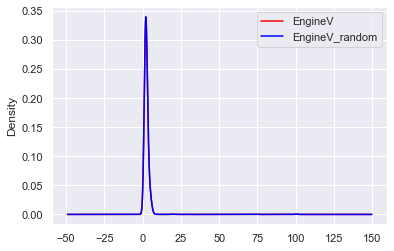

In [29]:
for var in var_with_na:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # original variable distribution
    X_train[var].plot(kind='kde', ax=ax, color = 'red')  
    # variable imputed with the randome
    X_train[var+'_random'].plot(kind='kde', ax=ax, color='blue')
    # add legends
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

#### Final decision

In [30]:
cont_vars = ['Mileage', 'EngineV', 'Year']

for var in var_with_na:
    X_train[var] = X_train[var+'_random']
    X_test[var] = X_test[var+'_random']
    X_train = X_train.drop([var+'_random'],axis=1)
    X_test = X_test.drop([var+'_random'],axis=1)

In [31]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class

Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.819644 (0.017177)
SVC: 0.773518 (0.027057)
LSVC: 0.757042 (0.024931)
LR: 0.757940 (0.026118)
DT: 0.857082 (0.020105)
GNB: 0.719875 (0.026519)
RF: 0.878051 (0.022544)
GB: 0.893040 (0.025173)
LGB: 0.890041 (0.020094)
ADA: 0.884963 (0.025412)
QDA: 0.724072 (0.033108)
NN: 0.666805 (0.112062)
XGB: 0.891843 (0.023977)


In [32]:
ModelEvaluation(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

KNN
Train set
Accuracy:  0.884062312762133
ROC AUC Score:  0.8698291432048446
Confusion matrix
Predicted     0     1
True                 
0          1951   162
1           225  1000
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2113
           1       0.86      0.82      0.84      1225

    accuracy                           0.88      3338
   macro avg       0.88      0.87      0.87      3338
weighted avg       0.88      0.88      0.88      3338

----------------------------------------------------------
Test set
Accuracy:  0.8275449101796407
ROC AUC Score:  0.805010610995953
Confusion matrix
Predicted    0    1
True               
0          470   58
1           86  221
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       528
           1       0.79      0.72      0.75       307

    accuracy                           0.83       835
   macro avg       0.82      0.81      0.81

Train set
Accuracy:  0.9104254044337927
ROC AUC Score:  0.9038606488501695
Confusion matrix
Predicted     0     1
True                 
0          1962   151
1           148  1077
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2113
           1       0.88      0.88      0.88      1225

    accuracy                           0.91      3338
   macro avg       0.90      0.90      0.90      3338
weighted avg       0.91      0.91      0.91      3338

----------------------------------------------------------
Test set
Accuracy:  0.9089820359281438
ROC AUC Score:  0.8980357319119534
Confusion matrix
Predicted    0    1
True               
0          496   32
1           44  263
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       528
           1       0.89      0.86      0.87       307

    accuracy                           0.91       835
   macro avg       0.91      0.90      0.90  

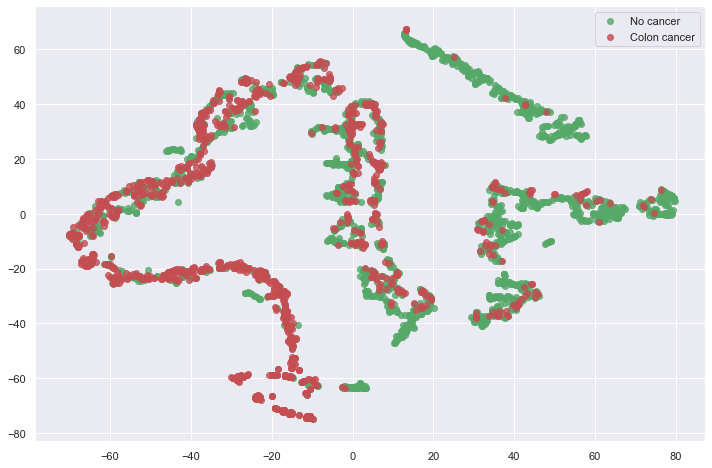

In [235]:
tsne_plot(X_train[cont_vars],  y_train)

No handles with labels found to put in legend.


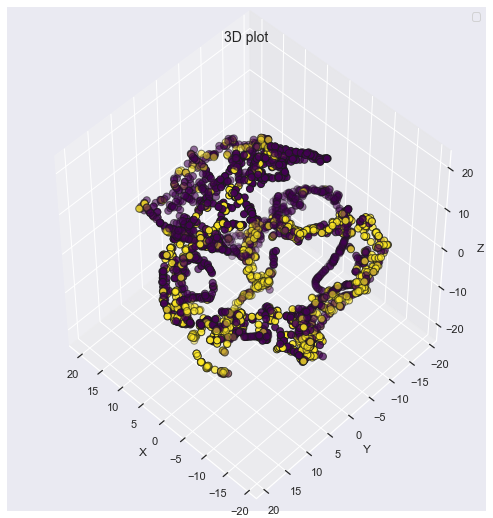

In [236]:
tsne_plot_3D(X_train[cont_vars], y_train)

In [33]:
X_train_bk1 = X_train.copy()
X_test_bk1 = X_test.copy()

### 7.1.3. Treating outliers

#### Approach 1: Removing outliers

In [34]:
X_train = X_train_bk1.copy()
X_test = X_test_bk1.copy()

In [35]:
# function to find upper and lower boundaries
# for normally distributed variables

def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [36]:
# function to find upper and lower boundaries
# for skewed distributed variables

def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

#### Year

Skewness: -0.927278
Kurtosis: 0.898837


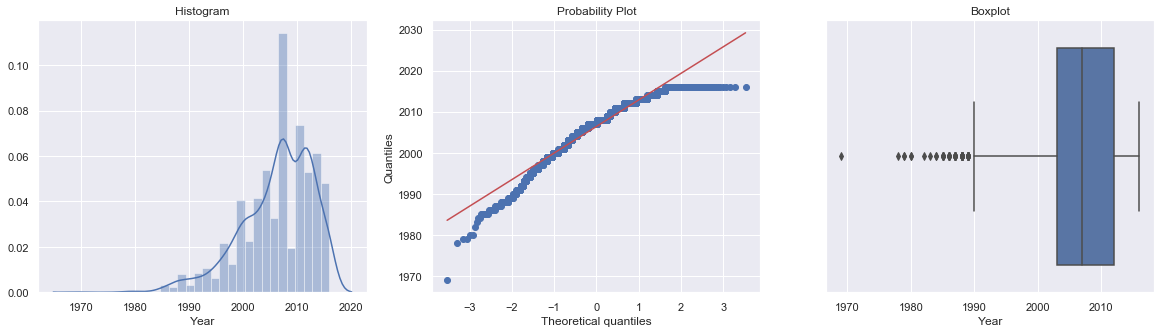

In [37]:
analyse_continuous(X_train,'Year',target)

In [38]:
# calculate boundaries for Year
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'Year')
upper_boundary, lower_boundary

(2026.3789059560274, 1986.376037123661)

In [39]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(X_train)))

print('cars with more than upper_boundary of Year (right end outliers): {}'.format(
    len(X_train[X_train['Year'] > upper_boundary])))

print('cars with less than lower_boundary of Year (left end outliers: {}'.format(
    len(X_train[X_train['Year'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(X_train[X_train['Year'] > upper_boundary]) / len(X_train)))

print('% left end outliers: {}'.format(
    len(X_train[X_train['Year'] < lower_boundary]) / len(X_train)))

total number of Year: 3338
cars with more than upper_boundary of Year (right end outliers): 0
cars with less than lower_boundary of Year (left end outliers: 27

% right end outliers: 0.0
% left end outliers: 0.008088675853804673


In [40]:
X_train = X_train[(X_train.Year < upper_boundary) & (X_train.Year > lower_boundary)]
X_test = X_test[(X_test.Year < upper_boundary) & (X_test.Year > lower_boundary)]

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class
X_train.shape

(3311, 9)

In [41]:
X_train.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class
0,BMW,other,136,2.4,Petrol,yes,2008,523,1
1,BMW,sedan,237,3.0,Diesel,yes,2003,530,0
2,Renault,vagon,170,1.5,Diesel,yes,2004,Kangoo,0
3,Toyota,crossover,40,2.7,Petrol,yes,2011,Land Cruiser Prado,1
4,Renault,van,285,1.9,Diesel,yes,2002,Trafic,0


Skewness: -0.748421
Kurtosis: 0.166924


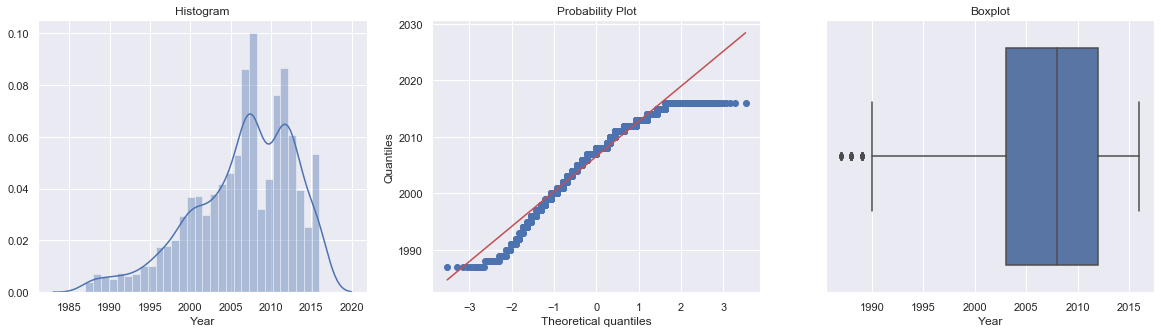

In [42]:
analyse_continuous(X_train,'Year',target)

#### Mileage

Skewness: 0.910249
Kurtosis: 3.380493


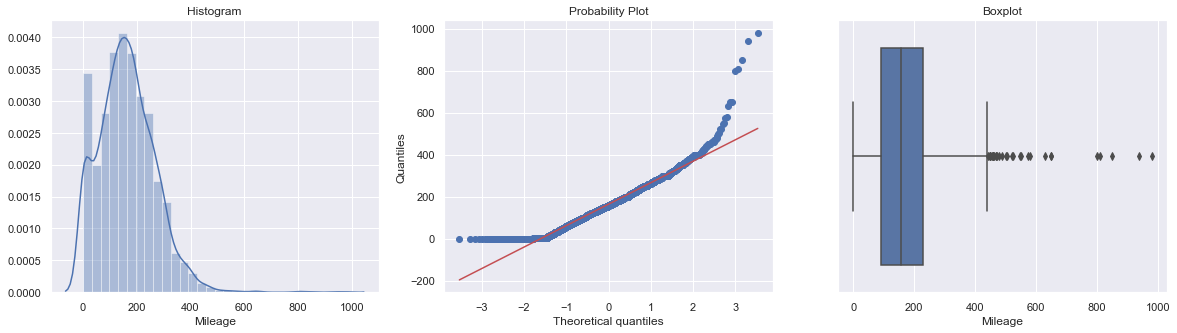

In [43]:
analyse_continuous(X_train,'Mileage',target)

In [44]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'Mileage', 2)
upper_boundary, lower_boundary

(510.0, -190.0)

In [45]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(X_train[X_train['Mileage'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(X_train[X_train['Mileage'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(X_train[X_train['Mileage'] > upper_boundary]) / len(X_train)))

print('% left end outliers: {}'.format(
    len(X_train[X_train['Mileage'] < lower_boundary]) / len(X_train)))

total number of Year: 4173
cars with more than upper_boundary of Mileage (right end outliers): 14
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.004228329809725159
% left end outliers: 0.0


In [46]:
X_train = X_train[(X_train.Mileage < upper_boundary) & (X_train.Mileage > lower_boundary)]
X_test = X_test[(X_test.Mileage < upper_boundary) & (X_test.Mileage > lower_boundary)]

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class
X_train.shape

(3297, 9)

Skewness: 0.356105
Kurtosis: -0.181664


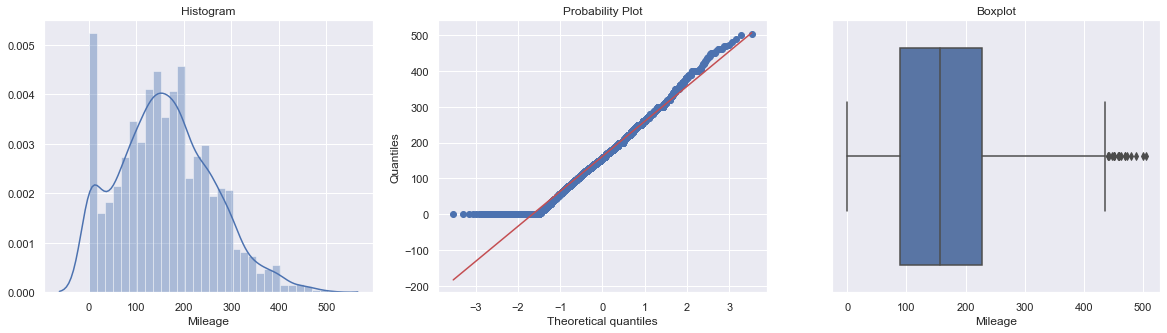

In [47]:
analyse_continuous(X_train,'Mileage',target)

#### EngineV

Skewness: 18.496636
Kurtosis: 374.885477


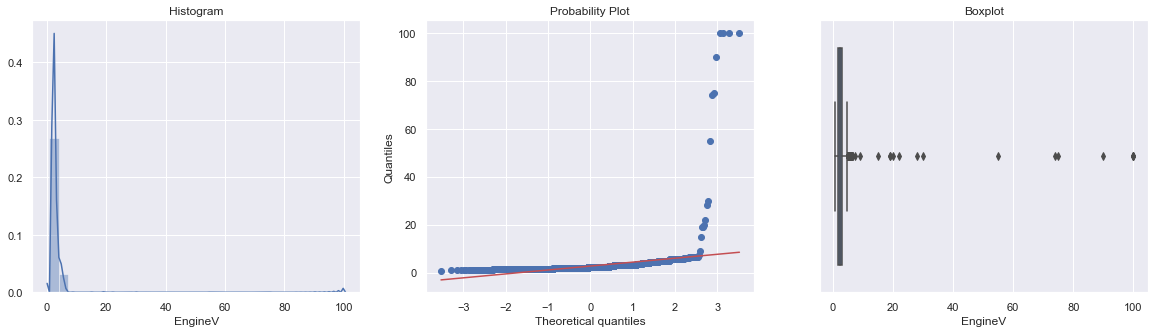

In [48]:
analyse_continuous(X_train,'EngineV',target)

In [49]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for LSTAT in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'EngineV', 5)
upper_boundary, lower_boundary

(9.0, -4.2)

In [50]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(X_train[X_train['EngineV'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(X_train[X_train['EngineV'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(X_train[X_train['EngineV'] > upper_boundary]) / len(X_train)))

print('% left end outliers: {}'.format(
    len(X_train[X_train['EngineV'] < lower_boundary]) / len(X_train)))

total number of Year: 4173
cars with more than upper_boundary of Mileage (right end outliers): 15
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.004549590536851683
% left end outliers: 0.0


In [51]:
X_train = X_train[(X_train.EngineV < upper_boundary) & (X_train.EngineV > lower_boundary)]
X_test = X_test[(X_test.EngineV < upper_boundary) & (X_test.EngineV > lower_boundary)]

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class
X_train.shape

(3281, 9)

Skewness: 1.515103
Kurtosis: 2.335405


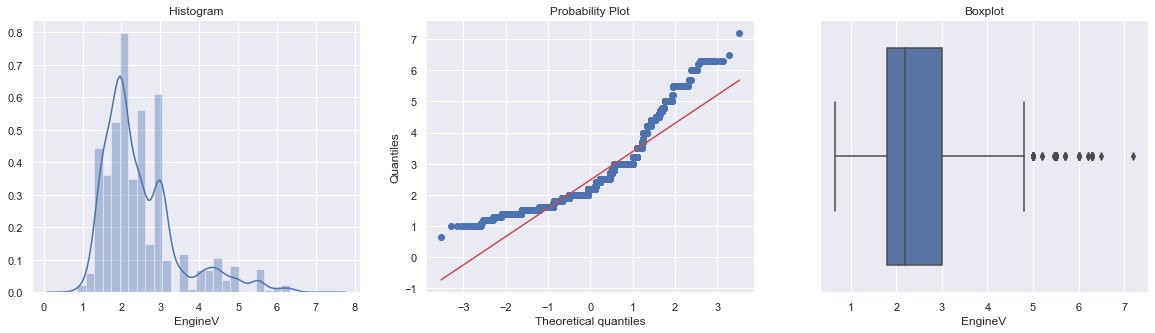

In [52]:
analyse_continuous(X_train,'EngineV',target)

In [53]:
import scipy


ttest_df = pd.DataFrame(columns = ['Feature','t-stats','p-value'])
ttest_df['Feature'] = num_vars

df0 = X_train[X_train['Class'] == 0]
df1 = X_train[X_train['Class'] == 1]

for var in cont_vars:
    result = scipy.stats.ttest_ind(df0[var], df1[var])
    ttest_df.loc[ttest_df['Feature'] == var,'t-stats'] = result[0]
    ttest_df.loc[ttest_df['Feature'] == var,'p-value'] = result[1]
  
ttest_df

,Feature,t-stats,p-value
0,Mileage,34.9187,2.03956e-227
1,EngineV,-24.2269,2.02054e-119
2,Year,-37.9193,3.19163e-261


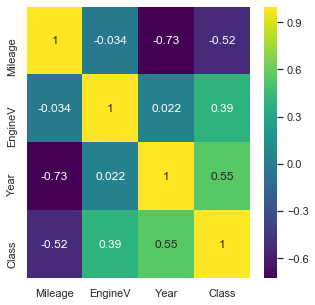

In [258]:
corr_df = X_train[cont_vars + ['Class']].corr()
# correlation matrix
plt.figure(figsize = (5,5))
sns.heatmap(corr_df, annot = True, cmap='viridis')
plt.show()

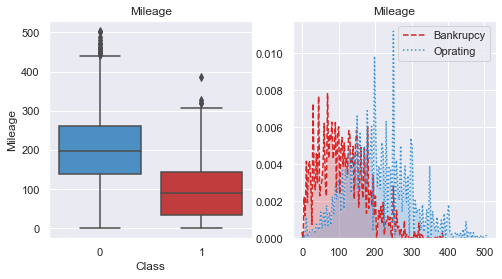

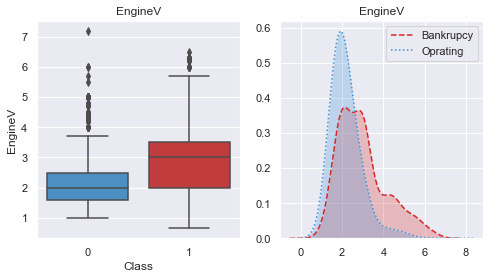

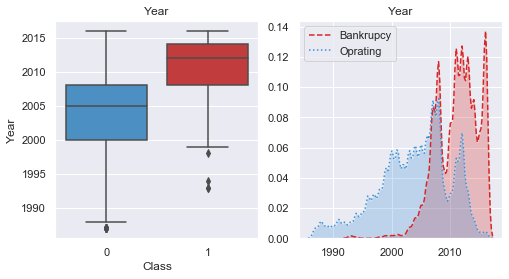

In [259]:
colors = ['#3791D7','#D72626']

for column in cont_vars:    
    plt.figure(figsize=[8,4])
    plt.subplot(121)
    sns.boxplot(x='Class', y=column,data=X_train,palette=colors)
    plt.title(column, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(X_train[X_train.Class==1][column], bw = 0.4, label = "Bankrupcy", shade=True, color="#D72626", linestyle="--")
    sns.kdeplot(X_train[X_train.Class==0][column], bw = 0.4, label = "Oprating", shade=True, color= "#3791D7", linestyle=":")
    plt.title(column, fontsize=12)
    plt.show()

#### Training model

In [260]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class

Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.818654 (0.016698)
SVC: 0.839080 (0.026173)
LSVC: 0.757097 (0.027663)
LR: 0.826583 (0.025446)
DT: 0.859804 (0.017937)
GNB: 0.825665 (0.030497)
RF: 0.878088 (0.019174)
GB: 0.893934 (0.023532)
LGB: 0.889670 (0.019063)
ADA: 0.878395 (0.032830)
QDA: 0.859194 (0.024696)
NN: 0.767149 (0.059052)
XGB: 0.891193 (0.025795)


In [261]:
ModelEvaluation(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

KNN
Train set
Accuracy:  0.8826577263029565
ROC AUC Score:  0.8683525594034226
Confusion matrix
Predicted     0    1
True                
0          1906  157
1           228  990
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2063
           1       0.86      0.81      0.84      1218

    accuracy                           0.88      3281
   macro avg       0.88      0.87      0.87      3281
weighted avg       0.88      0.88      0.88      3281

----------------------------------------------------------
Test set
Accuracy:  0.8257668711656442
ROC AUC Score:  0.805770638314265
Confusion matrix
Predicted    0    1
True               
0          451   58
1           84  222
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       509
           1       0.79      0.73      0.76       306

    accuracy                           0.83       815
   macro avg       0.82      0.81      0.81   

Train set
Accuracy:  0.9088692471807376
ROC AUC Score:  0.9009660393818049
Confusion matrix
Predicted     0     1
True                 
0          1922   141
1           158  1060
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2063
           1       0.88      0.87      0.88      1218

    accuracy                           0.91      3281
   macro avg       0.90      0.90      0.90      3281
weighted avg       0.91      0.91      0.91      3281

----------------------------------------------------------
Test set
Accuracy:  0.9067484662576687
ROC AUC Score:  0.8966703904875637
Confusion matrix
Predicted    0    1
True               
0          477   32
1           44  262
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       509
           1       0.89      0.86      0.87       306

    accuracy                           0.91       815
   macro avg       0.90      0.90      0.90  

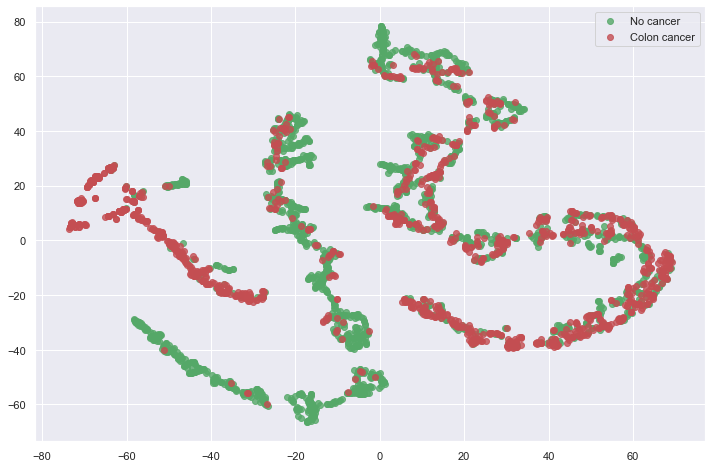

In [262]:
tsne_plot(X_train[cont_vars],  y_train)

### Trimming (Top-coding/bottom-coding/zero-coding)

In [54]:
X_train = X_train_bk1.copy()
X_test = X_test_bk1.copy()

X_train.shape

(3338, 9)

Skewness: -0.835363
Kurtosis: 0.393231


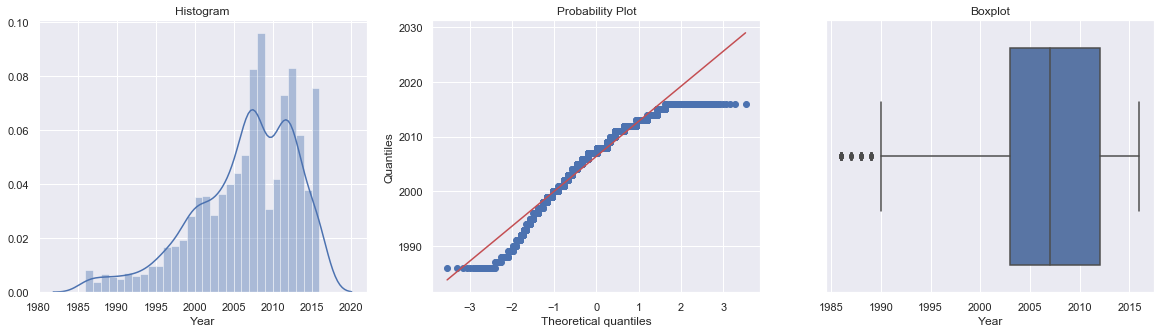

In [55]:
X_train.loc[X_train.Year < 1986,'Year'] = 1986
X_test.loc[X_test.Year < 1986,'Year'] = 1986
analyse_continuous(X_train,'Year',target)

In [56]:
X_train.shape

(3338, 9)

Skewness: 0.459713
Kurtosis: 0.117242


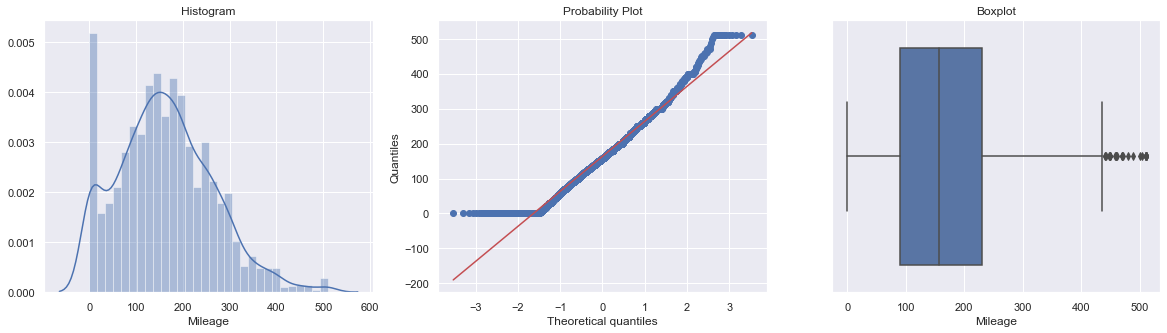

In [57]:
X_train.loc[X_train.Mileage > 510,'Mileage'] = 510
X_test.loc[X_test.Mileage > 510,'Mileage'] = 510
analyse_continuous(X_train,'Mileage',target)

In [58]:
X_train.shape

(3338, 9)

Skewness: 1.508737
Kurtosis: 2.162504


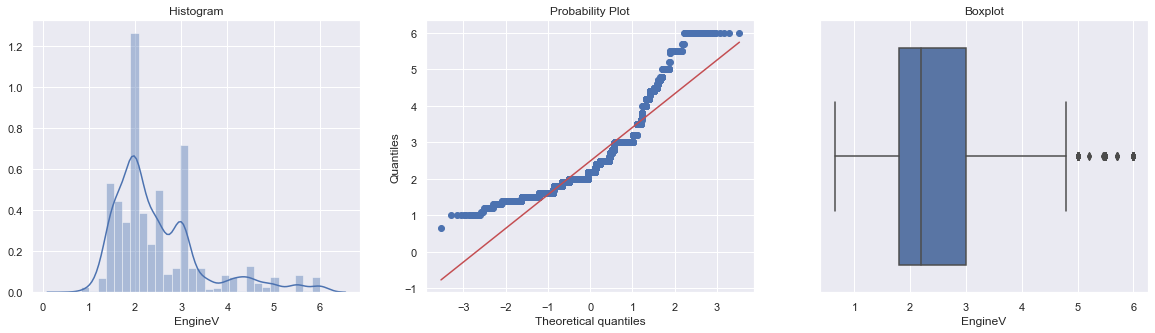

In [59]:
X_train.loc[X_train.EngineV > 6.0,'EngineV'] = 6.0
X_test.loc[X_test.EngineV > 6.0,'EngineV'] = 6.0
analyse_continuous(X_train,'EngineV',target)

In [60]:
X_train[cont_vars].shape,y_train.shape

((3338, 3), (3281,))

In [61]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class

Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.817850 (0.017400)
SVC: 0.831928 (0.020654)
LSVC: 0.757942 (0.024308)
LR: 0.819941 (0.021874)
DT: 0.857686 (0.014774)
GNB: 0.821741 (0.032174)
RF: 0.876555 (0.020696)
GB: 0.892742 (0.022844)
LGB: 0.889743 (0.016911)
ADA: 0.880469 (0.026596)
QDA: 0.852904 (0.024688)
NN: 0.683867 (0.120161)
XGB: 0.890045 (0.023703)


In [62]:
ModelEvaluation(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

KNN
Train set
Accuracy:  0.8831635710005992
ROC AUC Score:  0.8696338507007156
Confusion matrix
Predicted     0     1
True                 
0          1945   168
1           222  1003
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2113
           1       0.86      0.82      0.84      1225

    accuracy                           0.88      3338
   macro avg       0.88      0.87      0.87      3338
weighted avg       0.88      0.88      0.88      3338

----------------------------------------------------------
Test set
Accuracy:  0.8287425149700599
ROC AUC Score:  0.8073209702892113
Confusion matrix
Predicted    0    1
True               
0          469   59
1           84  223
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       528
           1       0.79      0.73      0.76       307

    accuracy                           0.83       835
   macro avg       0.82      0.81      0.

Train set
Accuracy:  0.908328340323547
ROC AUC Score:  0.9010035059930267
Confusion matrix
Predicted     0     1
True                 
0          1962   151
1           155  1070
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2113
           1       0.88      0.87      0.87      1225

    accuracy                           0.91      3338
   macro avg       0.90      0.90      0.90      3338
weighted avg       0.91      0.91      0.91      3338

----------------------------------------------------------
Test set
Accuracy:  0.9101796407185628
ROC AUC Score:  0.8989827016089231
Confusion matrix
Predicted    0    1
True               
0          497   31
1           44  263
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       528
           1       0.89      0.86      0.88       307

    accuracy                           0.91       835
   macro avg       0.91      0.90      0.90   

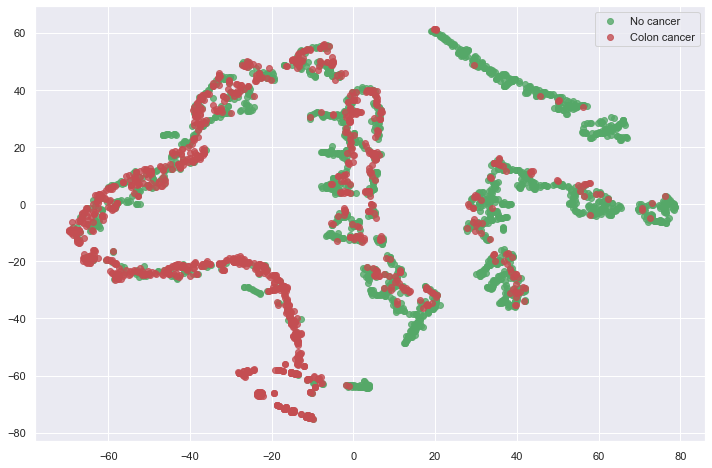

In [63]:
tsne_plot(X_train[cont_vars],  y_train)

### Equal frequency discretisation

In [64]:
X_train = X_train_bk1.copy()
X_test = X_test_bk1.copy()

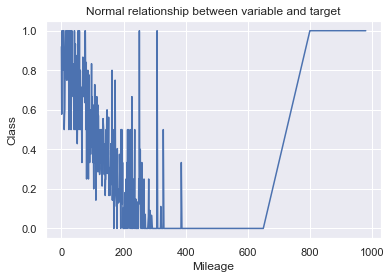

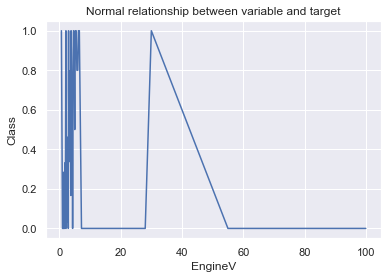

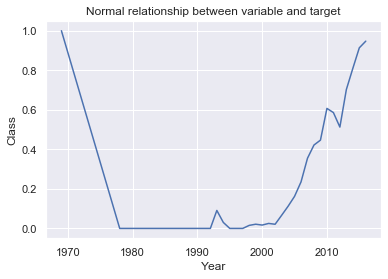

In [65]:
for var in cont_vars:
    fig = plt.figure()
    fig = X_train.groupby([var])['Class'].mean().plot()
    fig.set_title('Normal relationship between variable and target')
    fig.set_ylabel('Class')

#### Discretisation with quantiles

In [66]:
# and now, I will divide into 10 quantiles for the rest of the exercise. I will leave the quantile
# boundary and generate labels as well for comparison

# create 10 labels, one for each quantile
labels = ['Q'+str(i+1) for i in range(0,10)]
print(labels)

# bins with labels
X_train['Year_disc_label'], bins = pd.qcut(x=X_train.Year, q=10, labels=labels, retbins=True, precision=3, duplicates='raise')

# bins with boundaries
X_train['Year_disc'], bins = pd.qcut(x=X_train.Year, q=10, retbins=True, precision=3, duplicates='raise')


X_train.head(10)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']


,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,Year_disc_label,Year_disc
0,BMW,other,136,2.4,Petrol,yes,2008,523,1,Q6,"(2007.0, 2009.0]"
1,BMW,sedan,237,3.0,Diesel,yes,2003,530,0,Q3,"(2001.0, 2004.0]"
2,Renault,vagon,170,1.5,Diesel,yes,2004,Kangoo,0,Q3,"(2001.0, 2004.0]"
3,Toyota,crossover,40,2.7,Petrol,yes,2011,Land Cruiser Prado,1,Q7,"(2009.0, 2011.0]"
4,Renault,van,285,1.9,Diesel,yes,2002,Trafic,0,Q3,"(2001.0, 2004.0]"
5,Mitsubishi,other,0,2.4,Diesel,yes,2016,L 200,1,Q10,"(2014.0, 2016.0]"
6,Toyota,sedan,110,2.4,Gas,yes,2007,Camry,0,Q5,"(2006.0, 2007.0]"
7,Mercedes-Benz,van,280,2.2,Diesel,yes,2001,Vito,0,Q2,"(1997.0, 2001.0]"
8,BMW,hatch,1,2.0,Petrol,yes,2006,120,0,Q4,"(2004.0, 2006.0]"
9,Volkswagen,other,15,1.2,Petrol,yes,2014,Golf VII,1,Q9,"(2012.0, 2014.0]"


In [67]:
bins

array([1969., 1997., 2001., 2004., 2006., 2007., 2009., 2011., 2012.,
       2014., 2016.])

In [68]:
# we use pandas cut method and pass the quantile edges calculated in the training set
X_test['Year_disc_label'] = pd.cut(x = X_test.Year, bins=bins, labels=labels)
X_test['Year_disc'] = pd.cut(x = X_test.Year, bins=bins)

X_test.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,Year_disc_label,Year_disc
0,Volkswagen,vagon,280,1.9,Diesel,yes,1996,Golf III,0,Q1,"(1969.0, 1997.0]"
1,Renault,vagon,95,1.5,Diesel,yes,2012,Megane,0,Q8,"(2011.0, 2012.0]"
2,BMW,sedan,45,3.0,Petrol,yes,2011,535,1,Q7,"(2009.0, 2011.0]"
3,Volkswagen,sedan,101,1.6,Petrol,yes,2012,Polo,0,Q8,"(2011.0, 2012.0]"
4,Renault,vagon,200,1.5,Diesel,yes,2007,Megane,0,Q5,"(2006.0, 2007.0]"


In [69]:
# let's check that we have equal frequency (equal number of observations per bin)
X_test.groupby('Year_disc')['Year'].count()

Year_disc
(1969.0, 1997.0]     92
(1997.0, 2001.0]     83
(2001.0, 2004.0]     94
(2004.0, 2006.0]     77
(2006.0, 2007.0]     67
(2007.0, 2009.0]    116
(2009.0, 2011.0]     95
(2011.0, 2012.0]     71
(2012.0, 2014.0]     82
(2014.0, 2016.0]     58
Name: Year, dtype: int64

Text(0, 0.5, 'Class')

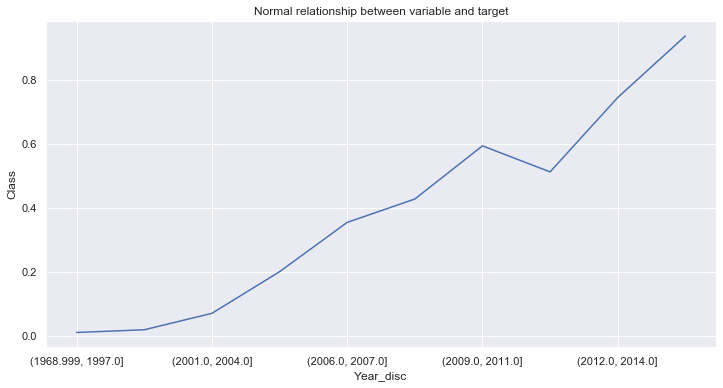

In [70]:
# and now let's observe the relationship between age and survival again, using the discrete Age transformed 
# variable

fig = plt.figure()
fig = X_train.groupby(['Year_disc'])['Class'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Class')

In [71]:
# order the intervals according to survival rate
ordered_labels = X_train.groupby(['Year_disc_label'])['Class'].mean().sort_values().index

# number the intervals according to survival rate
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 

# remap the intervals to the encoded variable
X_train['Year_disc_ordered'] = X_train.Year_disc_label.map(ordinal_label)
X_test['Year_disc_ordered'] = X_test.Year_disc_label.map(ordinal_label)
X_train['Year_disc_ordered'] = X_train['Year_disc_ordered'].astype('int')
X_test['Year_disc_ordered'] = X_test['Year_disc_ordered'].astype('int')

X_train.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,Year_disc_label,Year_disc,Year_disc_ordered
0,BMW,other,136,2.4,Petrol,yes,2008,523,1,Q6,"(2007.0, 2009.0]",5
1,BMW,sedan,237,3.0,Diesel,yes,2003,530,0,Q3,"(2001.0, 2004.0]",2
2,Renault,vagon,170,1.5,Diesel,yes,2004,Kangoo,0,Q3,"(2001.0, 2004.0]",2
3,Toyota,crossover,40,2.7,Petrol,yes,2011,Land Cruiser Prado,1,Q7,"(2009.0, 2011.0]",7
4,Renault,van,285,1.9,Diesel,yes,2002,Trafic,0,Q3,"(2001.0, 2004.0]",2


Text(0, 0.5, 'Survived')

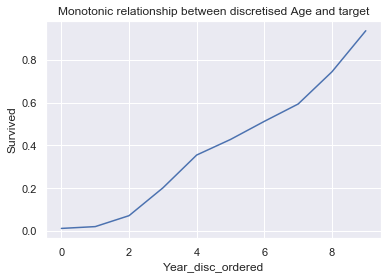

In [72]:
# plot the monotonic relationship
fig = plt.figure()
fig = X_train.groupby(['Year_disc_ordered'])['Class'].mean().sort_values(ascending = True).plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

In [73]:
cont_vars = ['Mileage', 'EngineV', 'Year_disc_ordered']

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class

Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.834623 (0.018099)
SVC: 0.811865 (0.018764)
LSVC: 0.761239 (0.025641)
LR: 0.785505 (0.022222)
DT: 0.860080 (0.021678)
GNB: 0.741148 (0.031503)
RF: 0.874149 (0.025761)
GB: 0.894238 (0.020112)
LGB: 0.885252 (0.017885)
ADA: 0.887054 (0.024676)
QDA: 0.756128 (0.032053)
NN: 0.851410 (0.016187)
XGB: 0.895136 (0.022866)


In [74]:
ModelEvaluation(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

KNN
Train set
Accuracy:  0.890653085680048
ROC AUC Score:  0.8784656692776496
Confusion matrix
Predicted     0     1
True                 
0          1953   160
1           205  1020
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2113
           1       0.86      0.83      0.85      1225

    accuracy                           0.89      3338
   macro avg       0.88      0.88      0.88      3338
weighted avg       0.89      0.89      0.89      3338

----------------------------------------------------------
Test set
Accuracy:  0.8526946107784431
ROC AUC Score:  0.8330773122100483
Confusion matrix
Predicted    0    1
True               
0          479   49
1           74  233
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       528
           1       0.83      0.76      0.79       307

    accuracy                           0.85       835
   macro avg       0.85      0.83      0.8

Train set
Accuracy:  0.908328340323547
ROC AUC Score:  0.898602045645518
Confusion matrix
Predicted     0     1
True                 
0          1976   137
1           169  1056
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2113
           1       0.89      0.86      0.87      1225

    accuracy                           0.91      3338
   macro avg       0.90      0.90      0.90      3338
weighted avg       0.91      0.91      0.91      3338

----------------------------------------------------------
Test set
Accuracy:  0.9089820359281438
ROC AUC Score:  0.8959906475175204
Confusion matrix
Predicted    0    1
True               
0          499   29
1           47  260
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       528
           1       0.90      0.85      0.87       307

    accuracy                           0.91       835
   macro avg       0.91      0.90      0.90    

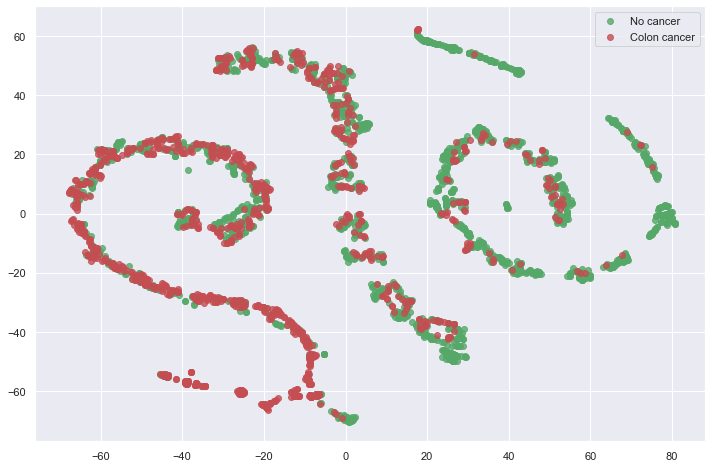

In [75]:
tsne_plot(X_train[cont_vars],  y_train)

Text(0, 0.5, 'Class')

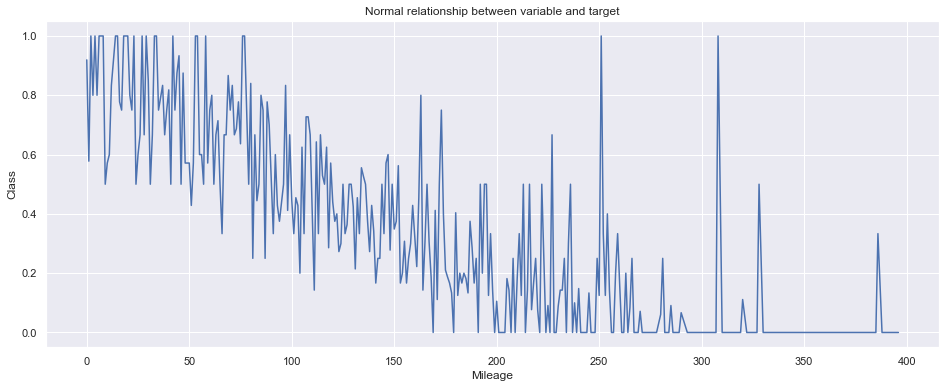

In [76]:
fig = plt.figure(figsize=(16,6))
fig = X_train[X_train.Mileage < 400].groupby([X_train.Mileage])['Class'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Class')

In [126]:
# and now, I will divide into 10 quantiles for the rest of the exercise. I will leave the quantile
# boundary and generate labels as well for comparison

# create 10 labels, one for each quantile
labels = ['Q'+str(i+1) for i in range(0,20)]
print(labels)

# bins with labels
X_train['Mileage_disc_label'], bins = pd.qcut(x=X_train.Mileage, q=20, labels=labels, retbins=True, precision=3, duplicates='raise')

# bins with boundaries
X_train['Mileage_disc'], bins = pd.qcut(x=X_train.Mileage, q=20, retbins=True, precision=3, duplicates='raise')


X_train.head(10)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20']


,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,Year_disc_label,Year_disc,Year_disc_ordered,Mileage_disc_label,Mileage_disc,Mileage_disc_ordered,log_EngineV,transformed_Year,Model_categorical,Model_numerical,BMW_numerical,MB_numerical,Audi_numerical,Toyota_numerical,Renault_numerical,Volkswagen_numerical,Mitsubishi_numerical
0,BMW,other,136,2.4,Petrol,yes,2008,523,1,Q6,"(2007.0, 2009.0]",5,Q9,"(133.0, 146.0]",11,0.875469,44.810713,Missing,523.0,523.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,BMW,sedan,237,3.0,Diesel,yes,2003,530,0,Q3,"(2001.0, 2004.0]",2,Q16,"(230.0, 250.0]",4,1.098612,44.754888,Missing,530.0,530.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,Renault,vagon,170,1.5,Diesel,yes,2004,Kangoo,0,Q3,"(2001.0, 2004.0]",2,Q11,"(157.5, 170.0]",9,0.405465,44.766059,Kangoo,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
3,Toyota,crossover,40,2.7,Petrol,yes,2011,Land Cruiser Prado,1,Q7,"(2009.0, 2011.0]",7,Q3,"(25.0, 53.0]",18,0.993252,44.844175,LandCruiserPrado,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
4,Renault,van,285,1.9,Diesel,yes,2002,Trafic,0,Q3,"(2001.0, 2004.0]",2,Q18,"(270.0, 298.0]",1,0.641854,44.743715,Trafic,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
5,Mitsubishi,other,0,2.4,Diesel,yes,2016,L 200,1,Q10,"(2014.0, 2016.0]",9,Q1,"(-0.001, 1.0]",17,0.875469,44.899889,L,200.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,200.0
6,Toyota,sedan,110,2.4,Gas,yes,2007,Camry,0,Q5,"(2006.0, 2007.0]",4,Q7,"(107.0, 121.0]",13,0.875469,44.799554,Camry,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
7,Mercedes-Benz,van,280,2.2,Diesel,yes,2001,Vito,0,Q2,"(1997.0, 2001.0]",1,Q18,"(270.0, 298.0]",1,0.788457,44.732538,Vito,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,BMW,hatch,1,2.0,Petrol,yes,2006,120,0,Q4,"(2004.0, 2006.0]",3,Q1,"(-0.001, 1.0]",17,0.693147,44.788391,Missing,120.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,Volkswagen,other,15,1.2,Petrol,yes,2014,Golf VII,1,Q9,"(2012.0, 2014.0]",8,Q2,"(1.0, 25.0]",19,0.182322,44.877611,GolfVII,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0


In [127]:
bins = bins - 1

In [128]:
bins

array([ -1.  ,   0.  ,  24.  ,  52.  ,  73.  ,  89.25, 106.  , 120.  ,
       132.  , 145.  , 156.5 , 169.  , 181.  , 196.  , 209.  , 229.  ,
       249.  , 269.  , 297.  , 339.  , 979.  ])

In [129]:
# we use pandas cut method and pass the quantile edges calculated in the training set
X_test['Mileage_disc_label'] = pd.cut(x = X_test.Mileage, bins=bins, labels=labels)
X_test['Mileage_disc'] = pd.cut(x = X_test.Mileage, bins=bins, precision=3, duplicates='raise')


X_test.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,Year_disc_label,Year_disc,Year_disc_ordered,Mileage_disc_label,Mileage_disc,Mileage_disc_ordered,log_EngineV,transformed_Year,Model_categorical,Model_numerical,BMW_numerical,MB_numerical,Audi_numerical,Toyota_numerical,Renault_numerical,Volkswagen_numerical,Mitsubishi_numerical
0,Volkswagen,vagon,280,1.9,Diesel,yes,1996,Golf III,0,Q1,"(1969.0, 1997.0]",0,Q18,"(269.0, 297.0]",1,0.641854,44.676616,GolfIII,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0
1,Renault,vagon,95,1.5,Diesel,yes,2012,Megane,0,Q8,"(2011.0, 2012.0]",6,Q6,"(89.25, 106.0]",14,0.405465,44.855323,Megane,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
2,BMW,sedan,45,3.0,Petrol,yes,2011,535,1,Q7,"(2009.0, 2011.0]",7,Q3,"(24.0, 52.0]",18,1.098612,44.844175,Missing,535.0,535.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,Volkswagen,sedan,101,1.6,Petrol,yes,2012,Polo,0,Q8,"(2011.0, 2012.0]",6,Q6,"(89.25, 106.0]",14,0.470004,44.855323,Polo,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0
4,Renault,vagon,200,1.5,Diesel,yes,2007,Megane,0,Q5,"(2006.0, 2007.0]",4,Q14,"(196.0, 209.0]",3,0.405465,44.799554,Megane,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0


In [130]:
X_test.loc[X_test['Mileage_disc_label'].isnull()==True,['Mileage','Mileage_disc_label','Year']]

,Mileage,Mileage_disc_label,Year


In [131]:
X_test.groupby('Mileage_disc')['Mileage'].count()

Mileage_disc
(-1.0, 0.0]       28
(0.0, 24.0]       54
(24.0, 52.0]      51
(52.0, 73.0]      44
(73.0, 89.25]     38
(89.25, 106.0]    52
(106.0, 120.0]    42
(120.0, 132.0]    39
(132.0, 145.0]    35
(145.0, 156.5]    24
(156.5, 169.0]    50
(169.0, 181.0]    42
(181.0, 196.0]    35
(196.0, 209.0]    32
(209.0, 229.0]    45
(229.0, 249.0]    49
(249.0, 269.0]    36
(269.0, 297.0]    52
(297.0, 339.0]    36
(339.0, 979.0]    51
Name: Mileage, dtype: int64

In [132]:
# let's check that we have equal frequency (equal number of observations per bin)
X_train.groupby('Mileage_disc')['Mileage'].count()

Mileage_disc
(-0.001, 1.0]     214
(1.0, 25.0]       122
(25.0, 53.0]      167
(53.0, 74.0]      168
(74.0, 90.25]     164
(90.25, 107.0]    173
(107.0, 121.0]    164
(121.0, 133.0]    167
(133.0, 146.0]    165
(146.0, 157.5]    165
(157.5, 170.0]    181
(170.0, 182.0]    156
(182.0, 197.0]    165
(197.0, 210.0]    172
(210.0, 230.0]    182
(230.0, 250.0]    198
(250.0, 270.0]    141
(270.0, 298.0]    142
(298.0, 340.0]    171
(340.0, 980.0]    161
Name: Mileage, dtype: int64

In [133]:
# order the intervals according to survival rate
ordered_labels = X_train.groupby(['Mileage_disc_label'])['Class'].mean().sort_values().index

# number the intervals according to survival rate
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 

ordinal_label

{'Q19': 0,
 'Q18': 1,
 'Q20': 2,
 'Q14': 3,
 'Q16': 4,
 'Q17': 5,
 'Q15': 6,
 'Q13': 7,
 'Q12': 8,
 'Q11': 9,
 'Q10': 10,
 'Q9': 11,
 'Q8': 12,
 'Q7': 13,
 'Q6': 14,
 'Q5': 15,
 'Q4': 16,
 'Q1': 17,
 'Q3': 18,
 'Q2': 19}

In [134]:
# remap the intervals to the encoded variable
X_train['Mileage_disc_ordered'] = X_train.Mileage_disc_label.map(ordinal_label)
X_test['Mileage_disc_ordered'] = X_test.Mileage_disc_label.map(ordinal_label)

In [135]:

X_train['Mileage_disc_ordered'] = X_train['Mileage_disc_ordered'].astype('int')
X_test['Mileage_disc_ordered'] = X_test['Mileage_disc_ordered'].astype('int')

X_train.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,Year_disc_label,Year_disc,Year_disc_ordered,Mileage_disc_label,Mileage_disc,Mileage_disc_ordered,log_EngineV,transformed_Year,Model_categorical,Model_numerical,BMW_numerical,MB_numerical,Audi_numerical,Toyota_numerical,Renault_numerical,Volkswagen_numerical,Mitsubishi_numerical
0,BMW,other,136,2.4,Petrol,yes,2008,523,1,Q6,"(2007.0, 2009.0]",5,Q9,"(133.0, 146.0]",11,0.875469,44.810713,Missing,523.0,523.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,BMW,sedan,237,3.0,Diesel,yes,2003,530,0,Q3,"(2001.0, 2004.0]",2,Q16,"(230.0, 250.0]",4,1.098612,44.754888,Missing,530.0,530.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,Renault,vagon,170,1.5,Diesel,yes,2004,Kangoo,0,Q3,"(2001.0, 2004.0]",2,Q11,"(157.5, 170.0]",9,0.405465,44.766059,Kangoo,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
3,Toyota,crossover,40,2.7,Petrol,yes,2011,Land Cruiser Prado,1,Q7,"(2009.0, 2011.0]",7,Q3,"(25.0, 53.0]",18,0.993252,44.844175,LandCruiserPrado,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
4,Renault,van,285,1.9,Diesel,yes,2002,Trafic,0,Q3,"(2001.0, 2004.0]",2,Q18,"(270.0, 298.0]",1,0.641854,44.743715,Trafic,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0


Text(0, 0.5, 'Class')

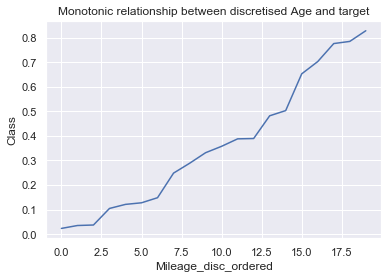

In [136]:
# plot the monotonic relationship
fig = plt.figure()
fig = X_train.groupby(['Mileage_disc_ordered'])['Class'].mean().sort_values(ascending = True).plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Class')

In [137]:
cont_vars = ['Mileage_disc_ordered', 'EngineV', 'Year_disc_ordered']

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class

Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.865477 (0.020846)
SVC: 0.859488 (0.019902)
LSVC: 0.863081 (0.019584)
LR: 0.854994 (0.022199)
DT: 0.875360 (0.022151)
GNB: 0.820544 (0.028947)
RF: 0.887042 (0.019657)
GB: 0.893342 (0.019556)
LGB: 0.892443 (0.016264)
ADA: 0.888256 (0.024986)
QDA: 0.839120 (0.017815)
NN: 0.873861 (0.023706)
XGB: 0.892744 (0.020986)


In [138]:
ModelEvaluation(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

KNN
Train set
Accuracy:  0.9005392450569203
ROC AUC Score:  0.8878182678655938
Confusion matrix
Predicted     0     1
True                 
0          1977   136
1           196  1029
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2113
           1       0.88      0.84      0.86      1225

    accuracy                           0.90      3338
   macro avg       0.90      0.89      0.89      3338
weighted avg       0.90      0.90      0.90      3338

----------------------------------------------------------
Test set
Accuracy:  0.8850299401197604
ROC AUC Score:  0.8661441368078175
Confusion matrix
Predicted    0    1
True               
0          495   33
1           63  244
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       528
           1       0.88      0.79      0.84       307

    accuracy                           0.89       835
   macro avg       0.88      0.87      0.

Train set
Accuracy:  0.9035350509286998
ROC AUC Score:  0.8960166896858127
Confusion matrix
Predicted     0     1
True                 
0          1953   160
1           162  1063
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2113
           1       0.87      0.87      0.87      1225

    accuracy                           0.90      3338
   macro avg       0.90      0.90      0.90      3338
weighted avg       0.90      0.90      0.90      3338

----------------------------------------------------------
Test set
Accuracy:  0.9053892215568863
ROC AUC Score:  0.8931497384266114
Confusion matrix
Predicted    0    1
True               
0          496   32
1           47  260
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       528
           1       0.89      0.85      0.87       307

    accuracy                           0.91       835
   macro avg       0.90      0.89      0.90  

Text(0, 0.5, 'Class')

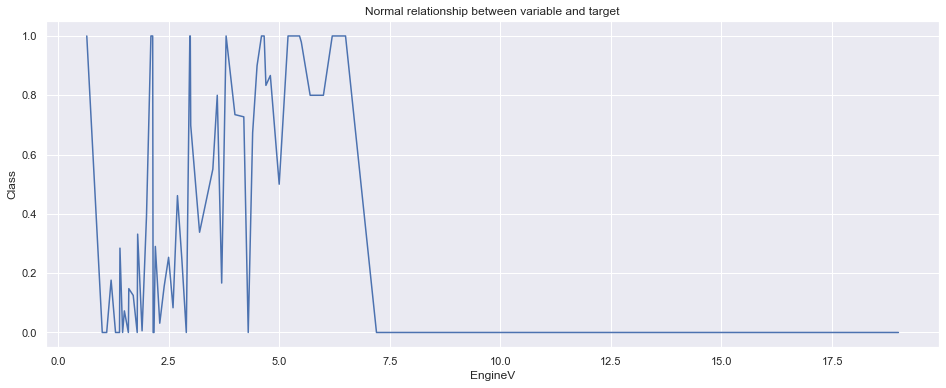

In [89]:
fig = plt.figure(figsize=(16,6))
fig = X_train[X_train.EngineV < 20].groupby([X_train.EngineV])['Class'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Class')

In [90]:
# let's check that we have equal frequency (equal number of observations per bin)
X_train.groupby('Mileage_disc')['Year'].count()

Mileage_disc
(-0.001, 1.0]     214
(1.0, 25.0]       122
(25.0, 53.0]      167
(53.0, 74.0]      168
(74.0, 90.25]     164
(90.25, 107.0]    173
(107.0, 121.0]    164
(121.0, 133.0]    167
(133.0, 146.0]    165
(146.0, 157.5]    165
(157.5, 170.0]    181
(170.0, 182.0]    156
(182.0, 197.0]    165
(197.0, 210.0]    172
(210.0, 230.0]    182
(230.0, 250.0]    198
(250.0, 270.0]    141
(270.0, 298.0]    142
(298.0, 340.0]    171
(340.0, 980.0]    161
Name: Year, dtype: int64

In [91]:
# order the intervals according to survival rate
ordered_labels = X_train.groupby(['Mileage_disc_label'])['Class'].mean().sort_values().index

# number the intervals according to survival rate
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 

# remap the intervals to the encoded variable
X_train['Mileage_disc_ordered'] = X_train.Mileage_disc_label.map(ordinal_label)
X_test['Mileage_disc_ordered'] = X_test.Mileage_disc_label.map(ordinal_label)

X_train.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,Year_disc_label,Year_disc,Year_disc_ordered,Mileage_disc_label,Mileage_disc,Mileage_disc_ordered
0,BMW,other,136,2.4,Petrol,yes,2008,523,1,Q6,"(2007.0, 2009.0]",5,Q9,"(133.0, 146.0]",11
1,BMW,sedan,237,3.0,Diesel,yes,2003,530,0,Q3,"(2001.0, 2004.0]",2,Q16,"(230.0, 250.0]",4
2,Renault,vagon,170,1.5,Diesel,yes,2004,Kangoo,0,Q3,"(2001.0, 2004.0]",2,Q11,"(157.5, 170.0]",9
3,Toyota,crossover,40,2.7,Petrol,yes,2011,Land Cruiser Prado,1,Q7,"(2009.0, 2011.0]",7,Q3,"(25.0, 53.0]",18
4,Renault,van,285,1.9,Diesel,yes,2002,Trafic,0,Q3,"(2001.0, 2004.0]",2,Q18,"(270.0, 298.0]",1


Skewness: 1.861294
Kurtosis: 4.589959


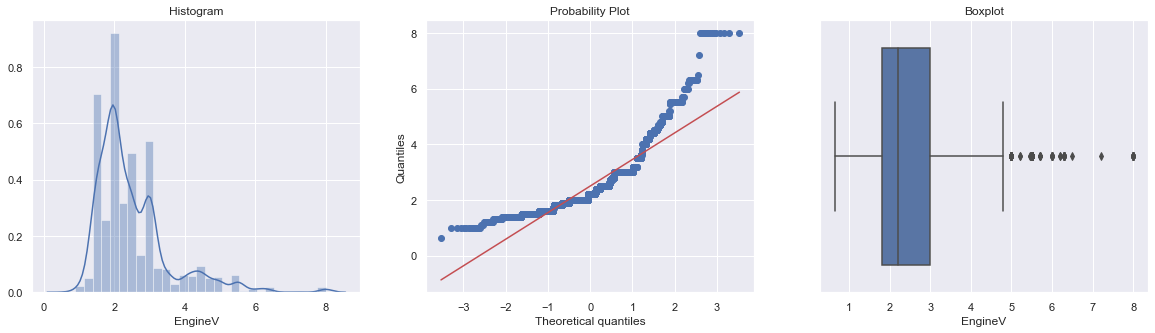

In [139]:
X_train.loc[X_train.EngineV > 9.0,'EngineV'] = 9.0
X_test.loc[X_test.EngineV > 9.0,'EngineV'] = 9.0
analyse_continuous(X_train,'EngineV',target)

In [140]:
cont_vars = ['Mileage_disc_ordered', 'EngineV', 'Year_disc_ordered']

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class

Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.865477 (0.020846)
SVC: 0.859488 (0.019902)
LSVC: 0.863081 (0.019584)
LR: 0.854994 (0.022199)
DT: 0.876258 (0.022946)
GNB: 0.820544 (0.028947)
RF: 0.887344 (0.021180)
GB: 0.893342 (0.019556)
LGB: 0.892443 (0.016264)
ADA: 0.888256 (0.024986)
QDA: 0.839120 (0.017815)
NN: 0.872665 (0.021449)
XGB: 0.892744 (0.020986)


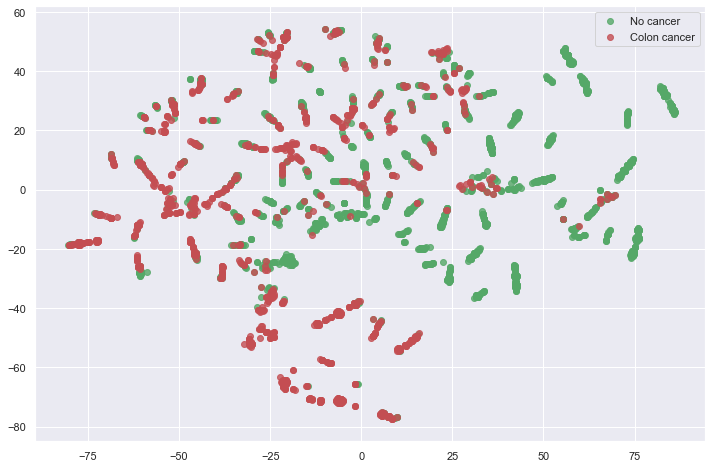

In [457]:
tsne_plot(X_train[cont_vars],  y_train)

### Equal width discretisation

#### Discretisation with range

In [337]:
# let's capture the range of the variable age to begin with

Year_range = X_train.Year.max() - X_train.Year.min()
Year_range

47

In [338]:
Year_range/10

4.7

In [340]:
# not let's capture the lower and upper boundaries

min_value = int(np.floor(X_train.Year.min()))
max_value = int(np.ceil(X_train.Year.max()))
range_value = max_value - min_value

# let's round the bin width
inter_value = int(np.round(range_value/10))

min_value, max_value, inter_value

(1969, 2016, 5)

In [342]:
# let's capture the interval limits, so we can pass them to the pandas cut function to generate
# the bins

intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
intervals

[1969, 1974, 1979, 1984, 1989, 1994, 1999, 2004, 2009, 2014, 2019]

In [343]:
# let's make labels to label the different bins
labels = ['Bin_'+str(i) for i in range(1,len(intervals))]
labels

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9',
 'Bin_10']

In [345]:
# create binned age

# create one column with labels
X_train['Year_disc_label'] = pd.cut(x = X_train.Year, bins=intervals, labels=labels, include_lowest=True)

# and one with bin boundaries
X_train['Year_disc'] = pd.cut(x = X_train.Year, bins=intervals, include_lowest=True)

X_train.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,Year_disc_label,Year_disc,Year_disc_ordered,Mileage_disc_label,Mileage_disc,Mileage_disc_ordered,Year_disc_labels
0,BMW,other,136,2.4,Petrol,yes,2008,523,1,Bin_8,"(2004.0, 2009.0]",5,Q9,"(133.0, 146.0]",11,Bin_8
1,BMW,sedan,237,3.0,Diesel,yes,2003,530,0,Bin_7,"(1999.0, 2004.0]",2,Q16,"(230.0, 250.0]",4,Bin_7
2,Renault,vagon,170,1.5,Diesel,yes,2004,Kangoo,0,Bin_7,"(1999.0, 2004.0]",2,Q11,"(157.5, 170.0]",9,Bin_7
3,Toyota,crossover,40,2.7,Petrol,yes,2011,Land Cruiser Prado,1,Bin_9,"(2009.0, 2014.0]",7,Q3,"(25.0, 53.0]",18,Bin_9
4,Renault,van,285,1.9,Diesel,yes,2002,Trafic,0,Bin_7,"(1999.0, 2004.0]",2,Q18,"(270.0, 298.0]",1,Bin_7


In [347]:
X_train.groupby('Year_disc')['Year'].count()

Year_disc
(1968.999, 1974.0]       1
(1974.0, 1979.0]         3
(1979.0, 1984.0]         6
(1984.0, 1989.0]        71
(1989.0, 1994.0]       115
(1994.0, 1999.0]       304
(1999.0, 2004.0]       587
(2004.0, 2009.0]      1017
(2009.0, 2014.0]       982
(2014.0, 2019.0]       252
Name: Year, dtype: int64

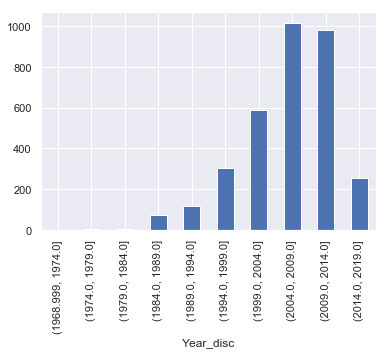

In [348]:
X_train.groupby('Year_disc')['Year'].count().plot.bar()

In [349]:
X_test['Year_disc_label'] = pd.cut(x = X_test.Year, bins=intervals, labels=labels, include_lowest=True)
X_test['Year_disc'] = pd.cut(x = X_test.Year, bins=intervals,  include_lowest=True)

X_test.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,Year_disc_label,Year_disc,Year_disc_ordered,Mileage_disc_label,Mileage_disc,Mileage_disc_ordered
0,Volkswagen,vagon,280,1.9,Diesel,yes,1996,Golf III,0,Bin_6,"(1994.0, 1999.0]",0,Q18,"(270.0, 298.0]",1
1,Renault,vagon,95,1.5,Diesel,yes,2012,Megane,0,Bin_9,"(2009.0, 2014.0]",6,Q6,"(90.25, 107.0]",14
2,BMW,sedan,45,3.0,Petrol,yes,2011,535,1,Bin_9,"(2009.0, 2014.0]",7,Q3,"(25.0, 53.0]",18
3,Volkswagen,sedan,101,1.6,Petrol,yes,2012,Polo,0,Bin_9,"(2009.0, 2014.0]",6,Q6,"(90.25, 107.0]",14
4,Renault,vagon,200,1.5,Diesel,yes,2007,Megane,0,Bin_8,"(2004.0, 2009.0]",4,Q14,"(197.0, 210.0]",3


Text(0,0.5,'Class')

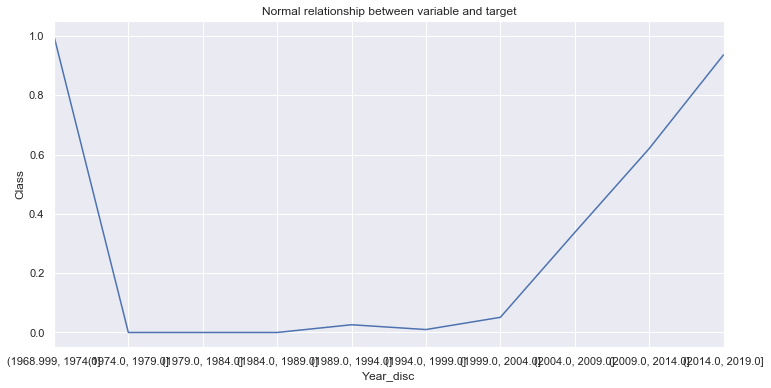

In [350]:
# and now let's observe the relationship between age and survival again, using the discrete Age transformed 
# variable

fig = plt.figure()
fig = X_train.groupby(['Year_disc'])['Class'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Class')

In [351]:
# order the bins according to survival rate
ordered_labels = X_train.groupby(['Year_disc_label'])['Class'].mean().sort_values().index
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)}

# transformed the discrete age variable
X_train['Year_disc_ordered'] = X_train.Year_disc_label.map(ordinal_label)
X_test['Year_disc_ordered'] = X_test.Year_disc_label.map(ordinal_label)

Text(0,0.5,'Survived')

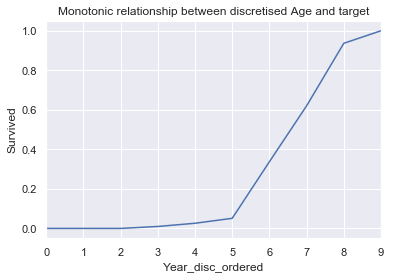

In [352]:
# plot the monotonic relationship
fig = plt.figure()
fig = X_train.groupby(['Year_disc_ordered'])['Class'].mean().sort_values(ascending = True).plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

In [353]:
cont_vars = ['Mileage', 'EngineV', 'Year_disc_ordered']

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class

Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.829225 (0.017566)
SVC: 0.771432 (0.023924)
LSVC: 0.759138 (0.027978)
LR: 0.770223 (0.028187)
DT: 0.854985 (0.019623)
GNB: 0.702807 (0.022681)
RF: 0.868163 (0.020789)
GB: 0.888846 (0.022959)
LGB: 0.887048 (0.018689)
ADA: 0.884057 (0.025335)
QDA: 0.689037 (0.023661)
NN: 0.807976 (0.053815)
XGB: nan (nan)


### Discretisation with Decision Trees

In [ ]:
from feature_engine import discretisers as dsc

### 7.1.4. Gaussian Transformation

+ transform Price to have linear relationship

#### Transform independent vars to have Normal distribution

Skewness: 0.692619
Kurtosis: 0.395968


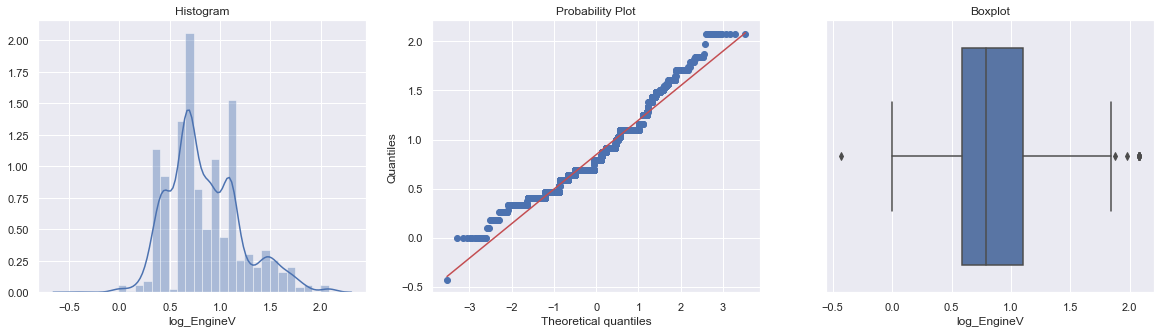

In [141]:
X_train['log_EngineV'] = np.log(X_train['EngineV'])
X_test['log_EngineV'] = np.log(X_test['EngineV'])

analyse_continuous(X_train,'log_EngineV',target)

Skewness: -0.932377
Kurtosis: 0.915858


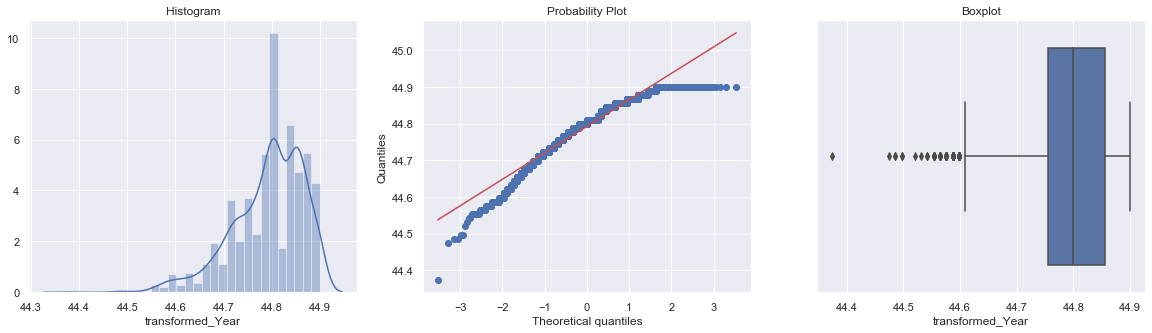

In [94]:
X_train['transformed_Year'] = X_train.Year**(1/2)
X_test['transformed_Year'] = X_test.Year**(1/2)

analyse_continuous(X_train,'transformed_Year',target)

In [95]:
cont_vars  = ['transformed_Year','Mileage','log_EngineV']

Predictive_Model(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

Optimization terminated successfully.
         Current function value: 0.309220
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 3338
Model:                          Logit   Df Residuals:                     3334
Method:                           MLE   Df Model:                            3
Date:                Wed, 30 Sep 2020   Pseudo R-squ.:                  0.5296
Time:                        07:31:39   Log-Likelihood:                -1032.2
converged:                       True   LL-Null:                       -2194.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1841.8612     91.971    -20.027      0.000   -2022.121   -1661.601
transforme

In [142]:
cont_vars  = ['Year','Mileage','log_EngineV']

Predictive_Model(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

Optimization terminated successfully.
         Current function value: 0.309195
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 3338
Model:                          Logit   Df Residuals:                     3334
Method:                           MLE   Df Model:                            3
Date:                Wed, 30 Sep 2020   Pseudo R-squ.:                  0.5296
Time:                        07:39:03   Log-Likelihood:                -1032.1
converged:                       True   LL-Null:                       -2194.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -923.2002     46.069    -20.039      0.000   -1013.494    -832.906
Year            0.4577    

In [143]:
cont_vars = ['Mileage_disc_ordered', 'log_EngineV', 'Year_disc_ordered']
Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.860685 (0.016990)
SVC: 0.868473 (0.018955)
LSVC: 0.853495 (0.017529)
LR: 0.869373 (0.017398)
DT: 0.877156 (0.022231)
GNB: 0.825639 (0.027020)
RF: 0.882848 (0.020131)
GB: 0.893342 (0.019556)
LGB: 0.892443 (0.016264)
ADA: 0.888256 (0.024986)
QDA: 0.862480 (0.021292)
NN: 0.870868 (0.023943)
XGB: 0.892744 (0.020986)


In [463]:
import scipy


ttest_df = pd.DataFrame(columns = ['Feature','t-stats','p-value'])
ttest_df['Feature'] = cont_vars

df0 = X_train[X_train['Class'] == 0]
df1 = X_train[X_train['Class'] == 1]

for var in cont_vars:
    result = scipy.stats.ttest_ind(df0[var], df1[var])
    ttest_df.loc[ttest_df['Feature'] == var,'t-stats'] = result[0]
    ttest_df.loc[ttest_df['Feature'] == var,'p-value'] = result[1]
  
ttest_df

,Feature,t-stats,p-value
0,Mileage_disc_ordered,-36.1616,6.80703e-242
1,log_EngineV,-23.1175,8.51473e-110
2,Year_disc_ordered,-43.1005,4.94066e-323


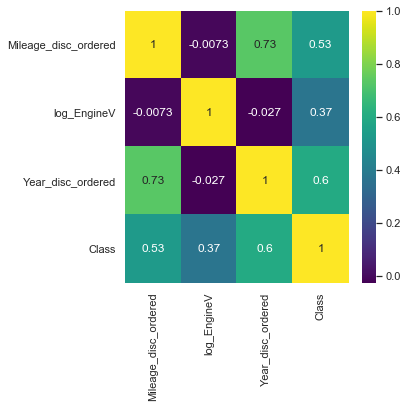

In [464]:
corr_df = X_train[cont_vars + ['Class']].corr()
# correlation matrix
plt.figure(figsize = (5,5))
sns.heatmap(corr_df, annot = True, cmap='viridis')
plt.show()

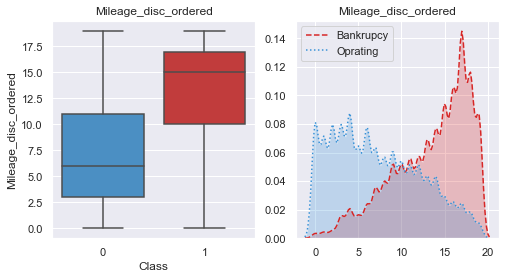

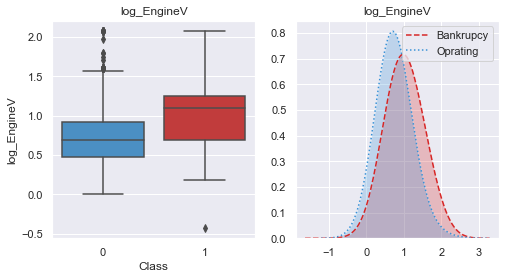

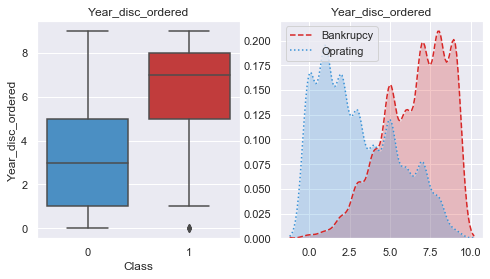

In [465]:
colors = ['#3791D7','#D72626']

for column in cont_vars:    
    plt.figure(figsize=[8,4])
    plt.subplot(121)
    sns.boxplot(x='Class', y=column,data=X_train,palette=colors)
    plt.title(column, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(X_train[X_train.Class==1][column], bw = 0.4, label = "Bankrupcy", shade=True, color="#D72626", linestyle="--")
    sns.kdeplot(X_train[X_train.Class==0][column], bw = 0.4, label = "Oprating", shade=True, color= "#3791D7", linestyle=":")
    plt.title(column, fontsize=12)
    plt.show()

#### Training model

In [466]:
Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.860685 (0.016990)
SVC: 0.868473 (0.018955)
LSVC: 0.853495 (0.017529)
LR: 0.869373 (0.017398)
DT: 0.876857 (0.021050)
GNB: 0.825639 (0.027020)
RF: 0.884045 (0.021455)
GB: 0.893342 (0.019556)
LGB: 0.892443 (0.016264)
ADA: 0.888256 (0.024986)
QDA: 0.862480 (0.021292)
NN: 0.867874 (0.025916)
XGB: 0.892744 (0.020986)


In [467]:
ModelEvaluation(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

KNN
Train set
Accuracy:  0.9011384062312762
ROC AUC Score:  0.8913791205076446
Confusion matrix
Predicted     0     1
True                 
0          1961   152
1           178  1047
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2113
           1       0.87      0.85      0.86      1225

    accuracy                           0.90      3338
   macro avg       0.90      0.89      0.89      3338
weighted avg       0.90      0.90      0.90      3338

----------------------------------------------------------
Test set
Accuracy:  0.8754491017964072
ROC AUC Score:  0.856523294837627
Confusion matrix
Predicted    0    1
True               
0          490   38
1           66  241
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       528
           1       0.86      0.79      0.82       307

    accuracy                           0.88       835
   macro avg       0.87      0.86      0.8

Train set
Accuracy:  0.9035350509286998
ROC AUC Score:  0.8960166896858127
Confusion matrix
Predicted     0     1
True                 
0          1953   160
1           162  1063
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2113
           1       0.87      0.87      0.87      1225

    accuracy                           0.90      3338
   macro avg       0.90      0.90      0.90      3338
weighted avg       0.90      0.90      0.90      3338

----------------------------------------------------------
Test set
Accuracy:  0.9053892215568863
ROC AUC Score:  0.8931497384266114
Confusion matrix
Predicted    0    1
True               
0          496   32
1           47  260
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       528
           1       0.89      0.85      0.87       307

    accuracy                           0.91       835
   macro avg       0.90      0.89      0.90  

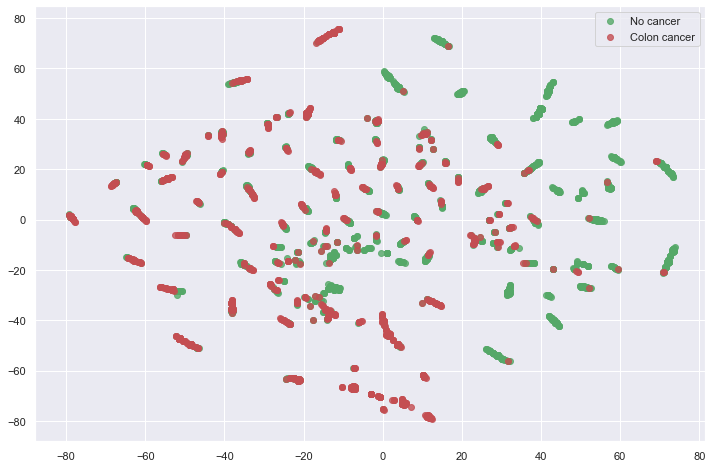

In [468]:
tsne_plot(X_train[cont_vars],  y_train)

## 7.2. Engineering categorical vars

### 7.2.1. Data Overview

In [98]:
X_train[cat_vars].head()

,Brand,Body,Engine Type,Registration,Model
0,BMW,other,Petrol,yes,523
1,BMW,sedan,Diesel,yes,530
2,Renault,vagon,Diesel,yes,Kangoo
3,Toyota,crossover,Petrol,yes,Land Cruiser Prado
4,Renault,van,Diesel,yes,Trafic


### 7.2.2. Engineering mixed vars

https://www.geeksforgeeks.org/python-extract-numbers-from-string/

https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8


In [144]:
print(len(X_train.Model.unique()))
X_train.Model.unique()

290


array(['523', '530', 'Kangoo', 'Land Cruiser Prado', 'Trafic', 'L 200',
       'Camry', 'Vito', '120', 'Golf VII', 'Passat B3', 'ML 320', 'X5',
       'Q7', '520', 'Golf Plus', 'T4 (Transporter)', '330', 'Laguna',
       'E-Class', 'Golf Variant', 'Yaris', 'X3', 'Carisma', 'CL 500',
       'Corolla', 'Galant', 'Pajero', 'Caddy', 'TT', 'T5 (Transporter)',
       'Auris', 'Passat B6', 'Space Star', 'Passat B5', 'Lancer', 'A8',
       'Touran', 'Pajero Sport', 'Lancer X', '100', 'Outlander XL', '200',
       'Avensis', 'A6 Allroad', 'A4', '320', '740', 'Outlander', 'A6',
       'Golf III', 'Fluence', 'Logan', 'Polo', 'Passat B4', 'GL 500',
       'Land Cruiser 200', 'Z4', 'Land Cruiser 100', 'Viano', 'G 500',
       'S 550', 'ML 400', 'Passat B7', 'Pajero Wagon', '80', 'S 350',
       '745', 'S 500', 'Rav 4', 'V 250', 'Jetta', 'Golf II', 'Duster',
       'Venza', 'LT', 'Multivan', 'Sprinter 208', 'GL 550',
       'Sprinter 313', 'Touareg', 'Master', '318', 'S 280',
       'Sprinter 212', 

In [145]:
X_train.Model = X_train.Model.apply(lambda x:x.strip())
X_test.Model = X_test.Model.apply(lambda x:x.strip())

In [146]:
print(len(X_train.Model.unique()))
X_train.Model.unique()

290


array(['523', '530', 'Kangoo', 'Land Cruiser Prado', 'Trafic', 'L 200',
       'Camry', 'Vito', '120', 'Golf VII', 'Passat B3', 'ML 320', 'X5',
       'Q7', '520', 'Golf Plus', 'T4 (Transporter)', '330', 'Laguna',
       'E-Class', 'Golf Variant', 'Yaris', 'X3', 'Carisma', 'CL 500',
       'Corolla', 'Galant', 'Pajero', 'Caddy', 'TT', 'T5 (Transporter)',
       'Auris', 'Passat B6', 'Space Star', 'Passat B5', 'Lancer', 'A8',
       'Touran', 'Pajero Sport', 'Lancer X', '100', 'Outlander XL', '200',
       'Avensis', 'A6 Allroad', 'A4', '320', '740', 'Outlander', 'A6',
       'Golf III', 'Fluence', 'Logan', 'Polo', 'Passat B4', 'GL 500',
       'Land Cruiser 200', 'Z4', 'Land Cruiser 100', 'Viano', 'G 500',
       'S 550', 'ML 400', 'Passat B7', 'Pajero Wagon', '80', 'S 350',
       '745', 'S 500', 'Rav 4', 'V 250', 'Jetta', 'Golf II', 'Duster',
       'Venza', 'LT', 'Multivan', 'Sprinter 208', 'GL 550',
       'Sprinter 313', 'Touareg', 'Master', '318', 'S 280',
       'Sprinter 212', 

#### Create dummy vars for all labels without removing first var

In [147]:
Train_dummy_df = pd.get_dummies(X_train.Model, drop_first=True)
print(Train_dummy_df.shape)
Train_dummy_df.head()

(3338, 289)


,100,11,116,118,120,19,190,200,21,210,220,230,25,250,300,316,318,320,323,324,325,328,330,335,4 Series Gran Coupe,4Runner,5 Series,5 Series GT,520,523,524,525,528,530,535,540,545,550,6 Series Gran Coupe,630,640,645,650,728,730,735,740,745,750,760,80,9,90,A 140,A 150,A 160,A 170,A 180,A1,A3,A4,A4 Allroad,A5,A6,A6 Allroad,A7,A8,ASX,Amarok,Auris,Avalon,Avensis,Aygo,B 180,B 200,B-Class Electric Drive,Beetle,Bora,C-Class,CL 180,CL 500,CL 55 AMG,CL 550,CL 63 AMG,CLA 200,CLA 220,CLA-Class,CLC 180,CLK 200,CLK 230,CLK 240,CLK 280,CLK 320,CLK 430,CLS 350,CLS 400,CLS 500,CLS 63 AMG,Caddy,Camry,Captur,Caravelle,Carina,Carisma,Celica,Clio,Colt,Corolla,Corolla Verso,Cross Touran,Dokker,Duster,E-Class,Eclipse,Eos,Espace,FJ Cruiser,Fluence,Fortuner,G 320,G 350,G 500,G 55 AMG,G 63 AMG,GL 320,GL 350,GL 420,GL 450,GL 500,GL 550,GLC-Class,GLE-Class,GLK 220,GLS 350,GLS 400,GLS 63,Galant,Golf GTI,Golf II,Golf III,Golf IV,Golf Plus,Golf V,Golf VI,Golf VII,Golf Variant,Grand Scenic,Grandis,Hiace,Highlander,Hilux,I3,IQ,Jetta,Kangoo,Koleos,L 200,L 400,LT,Laguna,Lancer,Lancer Evolution,Lancer X,Lancer X Sportback,Land Cruiser 100,Land Cruiser 105,Land Cruiser 200,Land Cruiser 76,Land Cruiser 80,Land Cruiser Prado,Latitude,Lite Ace,Logan,Lupo,M5,M6,MB,ML 250,ML 270,ML 280,ML 320,ML 350,ML 400,ML 500,ML 550,ML 63 AMG,Mark II,Master,Matrix,Megane,Modus,Multivan,New Beetle,Outlander,Outlander XL,Pajero,Pajero Pinin,Pajero Sport,Pajero Wagon,Passat B2,Passat B3,Passat B4,Passat B5,Passat B6,Passat B7,Passat B8,Passat CC,Phaeton,Pointer,Polo,Previa,Prius,Q3,Q5,Q7,R8,Rav 4,S 140,S 250,S 280,S 300,S 320,S 350,S 400,S 420,S 430,S 500,S 55,S 550,S 600,S 63 AMG,S 65 AMG,S-Guard,S4,S5,S8,SL 55 AMG,SLK 200,Sandero,Sandero StepWay,Scenic,Scirocco,Sequoia,Sharan,Sienna,Space Star,Space Wagon,Sprinter,Sprinter 208,Sprinter 211,Sprinter 212,Sprinter 213,Sprinter 312,Sprinter 313,Sprinter 316,Sprinter 318,Sprinter 319,Symbol,Syncro,T2 (Transporter),T3 (Transporter),T4 (Transporter),T5 (Transporter),T6 (Transporter),TT,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,Up,V 250,Vaneo,Vento,Venza,Viano,Virage,Vista,Vito,X1,X3,X5,X5 M,X6,X6 M,Yaris,Z3,Z4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [148]:
Test_dummy_df = pd.get_dummies(X_test.Model, drop_first=True)
print(Test_dummy_df.shape)
Test_dummy_df.head()

(835, 175)


,200,210,220,230,25,316,318,320,325,328,330,335,428,5,5 Series GT,520,523,525,528,530,535,540,645,730,735,750,760,80,A 140,A 150,A 170,A1,A3,A4,A5,A6,A6 Allroad,A7,A8,ASX,Auris,Avalon,Avensis,B 170,B 180,C-Class,CL 500,CL 63 AMG,CLA 200,CLC 200,CLK 220,CLS 350,CLS 500,CLS 63 AMG,Caddy,Camry,Caravelle,Carisma,Clio,Corolla,Duster,E-Class,Espace,FJ Cruiser,G 350,G 500,G 55 AMG,GL 320,GL 450,GLE-Class,GLK 300,GLS 350,GLS 400,GLS 500,GLS 63,Galant,Golf II,Golf III,Golf IV,Golf Plus,Golf V,Golf VI,Golf VII,Golf Variant,Grand Scenic,Grandis,Hiace,Highlander,Hilux,Jetta,Kangoo,Koleos,L 200,Laguna,Lancer,Lancer X,Land Cruiser 100,Land Cruiser 200,Land Cruiser Prado,Logan,ML 250,ML 270,ML 320,ML 350,ML 400,ML 430,ML 63 AMG,Megane,Multivan,New Beetle,Outlander,Outlander XL,Pajero Sport,Pajero Wagon,Passat B3,Passat B4,Passat B5,Passat B6,Passat B7,Passat B8,Passat CC,Phaeton,Polo,Prius,Q3,Q5,Q7,R 320,R8,Rav 4,S 140,S 320,S 350,S 400,S 500,S 600,S4,S8,SL 500 (550),SLK 350,Sandero,Scenic,Scion,Scirocco,Sharan,Smart,Sprinter 208,Sprinter 210,Sprinter 311,Sprinter 312,Sprinter 313,Sprinter 315,Sprinter 318,Sprinter 324,Symbol,T4 (Transporter),T5 (Transporter),T6 (Transporter),Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,V 250,Vento,Viano,Vito,X1,X3,X5,X5 M,X6,Yaris,Z4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [149]:
missing_vars = [var for var in Train_dummy_df.columns if var not in Test_dummy_df.columns]
print(len(missing_vars))

for var in missing_vars:
    Test_dummy_df[var] = int(0)
    
len(Test_dummy_df.columns)

131


306

In [150]:
Test_dummy_df.head()

,200,210,220,230,25,316,318,320,325,328,330,335,428,5,5 Series GT,520,523,525,528,530,535,540,645,730,735,750,760,80,A 140,A 150,A 170,A1,A3,A4,A5,A6,A6 Allroad,A7,A8,ASX,Auris,Avalon,Avensis,B 170,B 180,C-Class,CL 500,CL 63 AMG,CLA 200,CLC 200,CLK 220,CLS 350,CLS 500,CLS 63 AMG,Caddy,Camry,Caravelle,Carisma,Clio,Corolla,Duster,E-Class,Espace,FJ Cruiser,G 350,G 500,G 55 AMG,GL 320,GL 450,GLE-Class,GLK 300,GLS 350,GLS 400,GLS 500,GLS 63,Galant,Golf II,Golf III,Golf IV,Golf Plus,Golf V,Golf VI,Golf VII,Golf Variant,Grand Scenic,Grandis,Hiace,Highlander,Hilux,Jetta,Kangoo,Koleos,L 200,Laguna,Lancer,Lancer X,Land Cruiser 100,Land Cruiser 200,Land Cruiser Prado,Logan,ML 250,ML 270,ML 320,ML 350,ML 400,ML 430,ML 63 AMG,Megane,Multivan,New Beetle,Outlander,Outlander XL,Pajero Sport,Pajero Wagon,Passat B3,Passat B4,Passat B5,Passat B6,Passat B7,Passat B8,Passat CC,Phaeton,Polo,Prius,Q3,Q5,Q7,R 320,R8,Rav 4,S 140,S 320,S 350,S 400,S 500,S 600,S4,S8,SL 500 (550),SLK 350,Sandero,Scenic,Scion,Scirocco,Sharan,Smart,Sprinter 208,Sprinter 210,Sprinter 311,Sprinter 312,Sprinter 313,Sprinter 315,Sprinter 318,Sprinter 324,Symbol,T4 (Transporter),T5 (Transporter),T6 (Transporter),Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,V 250,Vento,Viano,Vito,X1,X3,X5,X5 M,X6,Yaris,Z4,100,11,116,118,120,19,190,21,250,300,323,324,4 Series Gran Coupe,4Runner,5 Series,524,545,550,6 Series Gran Coupe,630,640,650,728,740,745,9,90,A 160,A 180,A4 Allroad,Amarok,Aygo,B 200,B-Class Electric Drive,Beetle,Bora,CL 180,CL 55 AMG,CL 550,CLA 220,CLA-Class,CLC 180,CLK 200,CLK 230,CLK 240,CLK 280,CLK 320,CLK 430,CLS 400,Captur,Carina,Celica,Colt,Corolla Verso,Cross Touran,Dokker,Eclipse,Eos,Fluence,Fortuner,G 320,G 63 AMG,GL 350,GL 420,GL 500,GL 550,GLC-Class,GLK 220,Golf GTI,I3,IQ,L 400,LT,Lancer Evolution,Lancer X Sportback,Land Cruiser 105,Land Cruiser 76,Land Cruiser 80,Latitude,Lite Ace,Lupo,M5,M6,MB,ML 280,ML 500,ML 550,Mark II,Master,Matrix,Modus,Pajero,Pajero Pinin,Passat B2,Pointer,Previa,S 250,S 280,S 300,S 420,S 430,S 55,S 550,S 63 AMG,S 65 AMG,S-Guard,S5,SL 55 AMG,SLK 200,Sandero StepWay,Sequoia,Sienna,Space Star,Space Wagon,Sprinter,Sprinter 211,Sprinter 212,Sprinter 213,Sprinter 316,Sprinter 319,Syncro,T2 (Transporter),T3 (Transporter),TT,Up,Vaneo,Venza,Virage,Vista,X6 M,Z3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [151]:
missing_vars = [var for var in Test_dummy_df.columns if var not in Train_dummy_df.columns]
print(len(missing_vars))

for var in missing_vars:
    Train_dummy_df[var] = int(0)
    
len(Train_dummy_df.columns)

17


306

In [152]:
Train_dummy_df.head()

,100,11,116,118,120,19,190,200,21,210,220,230,25,250,300,316,318,320,323,324,325,328,330,335,4 Series Gran Coupe,4Runner,5 Series,5 Series GT,520,523,524,525,528,530,535,540,545,550,6 Series Gran Coupe,630,640,645,650,728,730,735,740,745,750,760,80,9,90,A 140,A 150,A 160,A 170,A 180,A1,A3,A4,A4 Allroad,A5,A6,A6 Allroad,A7,A8,ASX,Amarok,Auris,Avalon,Avensis,Aygo,B 180,B 200,B-Class Electric Drive,Beetle,Bora,C-Class,CL 180,CL 500,CL 55 AMG,CL 550,CL 63 AMG,CLA 200,CLA 220,CLA-Class,CLC 180,CLK 200,CLK 230,CLK 240,CLK 280,CLK 320,CLK 430,CLS 350,CLS 400,CLS 500,CLS 63 AMG,Caddy,Camry,Captur,Caravelle,Carina,Carisma,Celica,Clio,Colt,Corolla,Corolla Verso,Cross Touran,Dokker,Duster,E-Class,Eclipse,Eos,Espace,FJ Cruiser,Fluence,Fortuner,G 320,G 350,G 500,G 55 AMG,G 63 AMG,GL 320,GL 350,GL 420,GL 450,GL 500,GL 550,GLC-Class,GLE-Class,GLK 220,GLS 350,GLS 400,GLS 63,Galant,Golf GTI,Golf II,Golf III,Golf IV,Golf Plus,Golf V,Golf VI,Golf VII,Golf Variant,Grand Scenic,Grandis,Hiace,Highlander,Hilux,I3,IQ,Jetta,Kangoo,Koleos,L 200,L 400,LT,Laguna,Lancer,Lancer Evolution,Lancer X,Lancer X Sportback,Land Cruiser 100,Land Cruiser 105,Land Cruiser 200,Land Cruiser 76,Land Cruiser 80,Land Cruiser Prado,Latitude,Lite Ace,Logan,Lupo,M5,M6,MB,ML 250,ML 270,ML 280,ML 320,ML 350,ML 400,ML 500,ML 550,ML 63 AMG,Mark II,Master,Matrix,Megane,Modus,Multivan,New Beetle,Outlander,Outlander XL,Pajero,Pajero Pinin,Pajero Sport,Pajero Wagon,Passat B2,Passat B3,Passat B4,Passat B5,Passat B6,Passat B7,Passat B8,Passat CC,Phaeton,Pointer,Polo,Previa,Prius,Q3,Q5,Q7,R8,Rav 4,S 140,S 250,S 280,S 300,S 320,S 350,S 400,S 420,S 430,S 500,S 55,S 550,S 600,S 63 AMG,S 65 AMG,S-Guard,S4,S5,S8,SL 55 AMG,SLK 200,Sandero,Sandero StepWay,Scenic,Scirocco,Sequoia,Sharan,Sienna,Space Star,Space Wagon,Sprinter,Sprinter 208,Sprinter 211,Sprinter 212,Sprinter 213,Sprinter 312,Sprinter 313,Sprinter 316,Sprinter 318,Sprinter 319,Symbol,Syncro,T2 (Transporter),T3 (Transporter),T4 (Transporter),T5 (Transporter),T6 (Transporter),TT,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,Up,V 250,Vaneo,Vento,Venza,Viano,Virage,Vista,Vito,X1,X3,X5,X5 M,X6,X6 M,Yaris,Z3,Z4,428,5,B 170,CLC 200,CLK 220,GLK 300,GLS 500,ML 430,R 320,SL 500 (550),SLK 350,Scion,Smart,Sprinter 210,Sprinter 311,Sprinter 315,Sprinter 324
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [153]:
Train_input_df = pd.concat([X_train[cont_vars],Train_dummy_df],axis=1)
Test_input_df = pd.concat([X_test[cont_vars],Test_dummy_df],axis=1)

In [ ]:
Model_Selection(Train_input_df, y_train, Test_input_df, y_test)

KNN: 0.906226 (0.015069)
SVC: 0.932597 (0.014304)
LSVC: 0.874176 (0.018747)
LR: 0.925707 (0.018629)
DT: 0.915815 (0.015602)
GNB: 0.682457 (0.032410)
RF: 0.931697 (0.014406)
GB: 0.920010 (0.018718)
LGB: 0.921803 (0.015907)
ADA: 0.914318 (0.016638)
QDA: 0.626724 (0.037399)


In [ ]:
ModelEvaluation(Train_input_df,  y_train, Test_input_df,y_test)

#### Extract numerical part and categorical part

In [170]:
import re 

def LetterPart_Extraction(init_string):
    # letter_part = " ".join(re.findall("[a-zA-Z]+", ini_string)) 
    letter_part = ''.join(filter(lambda chr: chr.isalpha(), init_string))
    return letter_part

def NumberPart_Extraction(init_string):
    # number_part = [int(s) for s in init_string.split() if s.isdigit()]
    number_part = ''.join(filter(lambda i: i.isdigit(), init_string))
    # number_part = list(map(int, re.findall(r'\d+', init_string))) 
    return number_part

X_train['Model_categorical'] = X_train.Model.apply(lambda x:LetterPart_Extraction(x))
X_train['Model_numerical'] = X_train.Model.apply(lambda x:NumberPart_Extraction(x))

X_test['Model_categorical'] = X_test.Model.apply(lambda x:LetterPart_Extraction(x))
X_test['Model_numerical'] = X_test.Model.apply(lambda x:NumberPart_Extraction(x))
X_train.head(5)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,Year_disc_label,Year_disc,Year_disc_ordered,Mileage_disc_label,Mileage_disc,Mileage_disc_ordered,log_EngineV,transformed_Year,Model_categorical,Model_numerical,BMW_numerical,MB_numerical,Audi_numerical,Toyota_numerical,Renault_numerical,Volkswagen_numerical,Mitsubishi_numerical
0,BMW,other,136,2.4,Petrol,yes,2008,523,1,Q6,"(2007.0, 2009.0]",5,Q9,"(133.0, 146.0]",11,0.875469,44.810713,,523,523.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,BMW,sedan,237,3.0,Diesel,yes,2003,530,0,Q3,"(2001.0, 2004.0]",2,Q16,"(230.0, 250.0]",4,1.098612,44.754888,,530,530.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,Renault,vagon,170,1.5,Diesel,yes,2004,Kangoo,0,Q3,"(2001.0, 2004.0]",2,Q11,"(157.5, 170.0]",9,0.405465,44.766059,Kangoo,,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
3,Toyota,crossover,40,2.7,Petrol,yes,2011,Land Cruiser Prado,1,Q7,"(2009.0, 2011.0]",7,Q3,"(25.0, 53.0]",18,0.993252,44.844175,LandCruiserPrado,,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
4,Renault,van,285,1.9,Diesel,yes,2002,Trafic,0,Q3,"(2001.0, 2004.0]",2,Q18,"(270.0, 298.0]",1,0.641854,44.743715,Trafic,,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0


In [171]:
print(len(X_train.Model_categorical.unique()))
X_train.Model_categorical.unique()

152


array(['', 'Kangoo', 'LandCruiserPrado', 'Trafic', 'L', 'Camry', 'Vito',
       'GolfVII', 'PassatB', 'ML', 'X', 'Q', 'GolfPlus', 'TTransporter',
       'Laguna', 'EClass', 'GolfVariant', 'Yaris', 'Carisma', 'CL',
       'Corolla', 'Galant', 'Pajero', 'Caddy', 'TT', 'Auris', 'SpaceStar',
       'Lancer', 'A', 'Touran', 'PajeroSport', 'LancerX', 'OutlanderXL',
       'Avensis', 'AAllroad', 'Outlander', 'GolfIII', 'Fluence', 'Logan',
       'Polo', 'GL', 'LandCruiser', 'Z', 'Viano', 'G', 'S', 'PajeroWagon',
       'Rav', 'V', 'Jetta', 'GolfII', 'Duster', 'Venza', 'LT', 'Multivan',
       'Sprinter', 'Touareg', 'Master', 'Hilux', 'GrandScenic', 'Colt',
       'GolfIV', 'CLK', 'M', 'Scenic', 'MarkII', 'Megane',
       'LancerEvolution', 'GolfVI', 'Up', 'CLA', 'Grandis', 'GLS', 'XM',
       'Bora', 'Highlander', 'CLSAMG', 'CClass', 'Symbol', 'Sharan',
       'Caravelle', 'SAMG', 'Tiguan', 'Syncro', 'Fortuner', 'GAMG',
       'FJCruiser', 'CLS', 'Series', 'Scirocco', 'Koleos', 'Clio',
      

In [172]:
print(len(X_test.Model_categorical.unique()))
X_test.Model_categorical.unique()

100


array(['GolfIII', 'Megane', '', 'Polo', 'PassatB', 'S', 'EClass', 'Smart',
       'Corolla', 'Vito', 'GLS', 'CClass', 'GolfIV', 'ASX', 'Sprinter',
       'LandCruiser', 'ML', 'Multivan', 'Galant', 'Avensis', 'Laguna',
       'Scenic', 'X', 'A', 'Trafic', 'PassatCC', 'Q', 'Clio',
       'LandCruiserPrado', 'FJCruiser', 'Touran', 'Scion', 'Logan',
       'TTransporter', 'Carisma', 'Touareg', 'GrandScenic', 'GolfVI',
       'Phaeton', 'Rav', 'Outlander', 'Kangoo', 'Hiace', 'Camry',
       'PajeroWagon', 'Lancer', 'Tundra', 'Tiguan', 'CLC', 'Caddy', 'L',
       'GL', 'Hilux', 'AAllroad', 'Highlander', 'Yaris', 'G', 'GLEClass',
       'LancerX', 'CLS', 'B', 'Prius', 'Sharan', 'Jetta', 'PajeroSport',
       'XM', 'CLAMG', 'GolfVariant', 'Grandis', 'Caravelle', 'Auris',
       'NewBeetle', 'GAMG', 'GolfII', 'MLAMG', 'Z', 'CLK', 'SL', 'Koleos',
       'V', 'Duster', 'GolfV', 'Viano', 'GolfVII', 'Sandero', 'Espace',
       'SLK', 'CLA', 'OutlanderXL', 'CLSAMG', 'CL', 'SeriesGT',
       'GolfPlu

In [173]:
X_train['Model_numerical'] = X_train['Model_numerical'].replace('',0)
X_train['Model_numerical'] = X_train['Model_numerical'].astype(float)
X_test['Model_numerical'] = X_test['Model_numerical'].replace('',0)
X_test['Model_numerical'] = X_test['Model_numerical'].astype(float)

X_train['BMW_numerical'] = X_train.Model_numerical
X_train.loc[(X_train.Brand != 'BMW'),'BMW_numerical'] = -1
X_test['BMW_numerical'] = X_test.Model_numerical
X_test.loc[(X_test.Brand != 'BMW'),'BMW_numerical'] = -1

X_train['MB_numerical'] = X_train.Model_numerical
X_train.loc[(X_train.Brand != 'Mercedes-Benz'),'MB_numerical'] = -1
X_test['MB_numerical'] = X_test.Model_numerical
X_test.loc[(X_test.Brand != 'Mercedes-Benz'),'MB_numerical'] = -1

X_train['Audi_numerical'] = X_train.Model_numerical
X_train.loc[(X_train.Brand != 'Audi'),'Audi_numerical'] = -1
X_test['Audi_numerical'] = X_test.Model_numerical
X_test.loc[(X_test.Brand != 'Audi'),'Audi_numerical'] = -1

X_train['Toyota_numerical'] = X_train.Model_numerical
X_train.loc[(X_train.Brand != 'Toyota'),'Toyota_numerical'] = -1
X_test['Toyota_numerical'] = X_test.Model_numerical
X_test.loc[(X_test.Brand != 'Toyota'),'Toyota_numerical'] = -1

X_train['Renault_numerical'] = X_train.Model_numerical
X_train.loc[(X_train.Brand != 'Renault'),'Renault_numerical'] = -1
X_test['Renault_numerical'] = X_test.Model_numerical
X_test.loc[(X_test.Brand != 'Renault'),'Renault_numerical'] = -1

X_train['Volkswagen_numerical'] = X_train.Model_numerical
X_train.loc[(X_train.Brand != 'Volkswagen'),'Volkswagen_numerical'] = -1
X_test['Volkswagen_numerical'] = X_test.Model_numerical
X_test.loc[(X_test.Brand != 'Volkswagen'),'Volkswagen_numerical'] = -1

X_train['Mitsubishi_numerical'] = X_train.Model_numerical
X_train.loc[(X_train.Brand != 'Mitsubishi'),'Mitsubishi_numerical'] = -1
X_test['Mitsubishi_numerical'] = X_test.Model_numerical
X_test.loc[(X_test.Brand != 'Mitsubishi'),'Mitsubishi_numerical'] = -1

### 7.2.3. Handling missing value

In [174]:
cat_vars = [var for var in df.columns if X_train[var].dtypes == 'O' and var != target]

X_train[cat_vars].head()

,Brand,Body,Engine Type,Registration,Model
0,BMW,other,Petrol,yes,523
1,BMW,sedan,Diesel,yes,530
2,Renault,vagon,Diesel,yes,Kangoo
3,Toyota,crossover,Petrol,yes,Land Cruiser Prado
4,Renault,van,Diesel,yes,Trafic


In [175]:
X_train['Model_categorical'] = X_train['Model_categorical'].replace('','Missing')
X_test['Model_categorical'] = X_test['Model_categorical'].replace('','Missing')

X_train['Model_categorical'].unique()

array(['Missing', 'Kangoo', 'LandCruiserPrado', 'Trafic', 'L', 'Camry',
       'Vito', 'GolfVII', 'PassatB', 'ML', 'X', 'Q', 'GolfPlus',
       'TTransporter', 'Laguna', 'EClass', 'GolfVariant', 'Yaris',
       'Carisma', 'CL', 'Corolla', 'Galant', 'Pajero', 'Caddy', 'TT',
       'Auris', 'SpaceStar', 'Lancer', 'A', 'Touran', 'PajeroSport',
       'LancerX', 'OutlanderXL', 'Avensis', 'AAllroad', 'Outlander',
       'GolfIII', 'Fluence', 'Logan', 'Polo', 'GL', 'LandCruiser', 'Z',
       'Viano', 'G', 'S', 'PajeroWagon', 'Rav', 'V', 'Jetta', 'GolfII',
       'Duster', 'Venza', 'LT', 'Multivan', 'Sprinter', 'Touareg',
       'Master', 'Hilux', 'GrandScenic', 'Colt', 'GolfIV', 'CLK', 'M',
       'Scenic', 'MarkII', 'Megane', 'LancerEvolution', 'GolfVI', 'Up',
       'CLA', 'Grandis', 'GLS', 'XM', 'Bora', 'Highlander', 'CLSAMG',
       'CClass', 'Symbol', 'Sharan', 'Caravelle', 'SAMG', 'Tiguan',
       'Syncro', 'Fortuner', 'GAMG', 'FJCruiser', 'CLS', 'Series',
       'Scirocco', 'Koleos', 

### 7.2.4. High cardinality

In [176]:
Train_dummy_df = pd.get_dummies(X_train.Model_categorical, drop_first=True)
Test_dummy_df = pd.get_dummies(X_test.Model_categorical, drop_first=True)


In [177]:
print(Train_dummy_df.shape)
Train_dummy_df.head()

(3338, 151)


,AAllroad,ASX,Amarok,Auris,Avalon,Avensis,Aygo,B,BClassElectricDrive,Beetle,Bora,CClass,CL,CLA,CLAClass,CLAMG,CLC,CLK,CLS,CLSAMG,Caddy,Camry,Captur,Caravelle,Carina,Carisma,Celica,Clio,Colt,Corolla,CorollaVerso,CrossTouran,Dokker,Duster,EClass,Eclipse,Eos,Espace,FJCruiser,Fluence,Fortuner,G,GAMG,GL,GLCClass,GLEClass,GLK,GLS,Galant,GolfGTI,GolfII,GolfIII,GolfIV,GolfPlus,GolfV,GolfVI,GolfVII,GolfVariant,GrandScenic,Grandis,Hiace,Highlander,Hilux,I,IQ,Jetta,Kangoo,Koleos,L,LT,Laguna,Lancer,LancerEvolution,LancerX,LancerXSportback,LandCruiser,LandCruiserPrado,Latitude,LiteAce,Logan,Lupo,M,MB,ML,MLAMG,MarkII,Master,Matrix,Megane,Missing,Modus,Multivan,NewBeetle,Outlander,OutlanderXL,Pajero,PajeroPinin,PajeroSport,PajeroWagon,PassatB,PassatCC,Phaeton,Pointer,Polo,Previa,Prius,Q,R,Rav,Runner,S,SAMG,SGuard,SLAMG,SLK,Sandero,SanderoStepWay,Scenic,Scirocco,Sequoia,Series,SeriesGT,SeriesGranCoupe,Sharan,Sienna,SpaceStar,SpaceWagon,Sprinter,Symbol,Syncro,TT,TTransporter,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,Up,V,Vaneo,Vento,Venza,Viano,Virage,Vista,Vito,X,XM,Yaris,Z
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [178]:
selected_list = ['Model_categorical']
def analyse_frequency_labels(df, var):
    df = df.copy()
    tmp = df[var].value_counts() / len(df)
    return tmp

for var in selected_list:
    print(analyse_frequency_labels(X_train, var))
    print()

Missing                0.126723
A                      0.071600
PassatB                0.049131
EClass                 0.048232
X                      0.041642
TTransporter           0.041043
Vito                   0.037747
Kangoo                 0.035351
Camry                  0.030557
S                      0.029958
Caddy                  0.029059
Megane                 0.019473
Trafic                 0.018874
Q                      0.018574
LandCruiserPrado       0.018274
Touareg                0.016177
LandCruiser            0.015279
Polo                   0.013182
CClass                 0.013182
LancerX                0.012283
Corolla                0.012283
Rav                    0.012283
Jetta                  0.011983
Lancer                 0.011983
PajeroWagon            0.011084
ML                     0.010485
Sprinter               0.009587
Avensis                0.008089
PajeroSport            0.006890
Auris                  0.006890
GL                     0.006890
GLS     

### Problems with high cardinality

In [179]:
missing_vars = [var for var in Train_dummy_df.columns if var not in Test_dummy_df.columns]
print(len(missing_vars))

for var in missing_vars:
    Test_dummy_df[var] = int(0)
    
len(Test_dummy_df.columns)

55


154

In [164]:
Test_dummy_df.head()

,AAllroad,ASX,Auris,Avalon,Avensis,B,CClass,CL,CLA,CLAMG,CLC,CLK,CLS,CLSAMG,Caddy,Camry,Caravelle,Carisma,Clio,Corolla,Duster,EClass,Espace,FJCruiser,G,GAMG,GL,GLEClass,GLK,GLS,Galant,GolfII,GolfIII,GolfIV,GolfPlus,GolfV,GolfVI,GolfVII,GolfVariant,GrandScenic,Grandis,Hiace,Highlander,Hilux,Jetta,Kangoo,Koleos,L,Laguna,Lancer,LancerX,LandCruiser,LandCruiserPrado,Logan,ML,MLAMG,Megane,Missing,Multivan,NewBeetle,Outlander,OutlanderXL,PajeroSport,PajeroWagon,PassatB,PassatCC,Phaeton,Polo,Prius,Q,R,Rav,S,SL,SLK,Sandero,Scenic,Scion,Scirocco,SeriesGT,Sharan,Smart,Sprinter,Symbol,TTransporter,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,V,Vento,Viano,Vito,X,XM,Yaris,Z,Amarok,Aygo,BClassElectricDrive,Beetle,Bora,CLAClass,Captur,Carina,Celica,Colt,CorollaVerso,CrossTouran,Dokker,Eclipse,Eos,Fluence,Fortuner,GLCClass,GolfGTI,I,IQ,LT,LancerEvolution,LancerXSportback,Latitude,LiteAce,Lupo,M,MB,MarkII,Master,Matrix,Modus,Pajero,PajeroPinin,Pointer,Previa,Runner,SAMG,SGuard,SLAMG,SanderoStepWay,Sequoia,Series,SeriesGranCoupe,Sienna,SpaceStar,SpaceWagon,Syncro,TT,Up,Vaneo,Venza,Virage,Vista
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [165]:
missing_vars = [var for var in Test_dummy_df.columns if var not in Train_dummy_df.columns]
print(len(missing_vars))

for var in missing_vars:
    Train_dummy_df[var] = int(0)
    
len(Train_dummy_df.columns)

3


154

In [166]:
Train_dummy_df.head()

,AAllroad,ASX,Amarok,Auris,Avalon,Avensis,Aygo,B,BClassElectricDrive,Beetle,Bora,CClass,CL,CLA,CLAClass,CLAMG,CLC,CLK,CLS,CLSAMG,Caddy,Camry,Captur,Caravelle,Carina,Carisma,Celica,Clio,Colt,Corolla,CorollaVerso,CrossTouran,Dokker,Duster,EClass,Eclipse,Eos,Espace,FJCruiser,Fluence,Fortuner,G,GAMG,GL,GLCClass,GLEClass,GLK,GLS,Galant,GolfGTI,GolfII,GolfIII,GolfIV,GolfPlus,GolfV,GolfVI,GolfVII,GolfVariant,GrandScenic,Grandis,Hiace,Highlander,Hilux,I,IQ,Jetta,Kangoo,Koleos,L,LT,Laguna,Lancer,LancerEvolution,LancerX,LancerXSportback,LandCruiser,LandCruiserPrado,Latitude,LiteAce,Logan,Lupo,M,MB,ML,MLAMG,MarkII,Master,Matrix,Megane,Missing,Modus,Multivan,NewBeetle,Outlander,OutlanderXL,Pajero,PajeroPinin,PajeroSport,PajeroWagon,PassatB,PassatCC,Phaeton,Pointer,Polo,Previa,Prius,Q,R,Rav,Runner,S,SAMG,SGuard,SLAMG,SLK,Sandero,SanderoStepWay,Scenic,Scirocco,Sequoia,Series,SeriesGT,SeriesGranCoupe,Sharan,Sienna,SpaceStar,SpaceWagon,Sprinter,Symbol,Syncro,TT,TTransporter,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,Up,V,Vaneo,Vento,Venza,Viano,Virage,Vista,Vito,X,XM,Yaris,Z,SL,Scion,Smart
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [167]:
Train_input_df = pd.concat([X_train[cont_vars],Train_dummy_df],axis=1)
Test_input_df = pd.concat([X_test[cont_vars],Test_dummy_df],axis=1)

In [168]:
Model_Selection(Train_input_df, y_train, Test_input_df, y_test)

KNN: 0.900539 (0.020348)
SVC: 0.930498 (0.011105)
LSVC: 0.876871 (0.014945)
LR: 0.926900 (0.013614)
DT: 0.900236 (0.014206)
GNB: 0.591684 (0.028074)
RF: 0.927202 (0.013725)
GB: 0.925704 (0.019492)
LGB: 0.927201 (0.012780)
ADA: 0.922703 (0.011384)
QDA: 0.616236 (0.083920)
NN: 0.937390 (0.015746)
XGB: 0.920010 (0.017320)


In [169]:
ModelEvaluation(Train_input_df,  y_train, Test_input_df,y_test)

KNN
Train set
Accuracy:  0.9367884961054523
ROC AUC Score:  0.9342899639742314
Confusion matrix
Predicted     0     1
True                 
0          1994   119
1            92  1133
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2113
           1       0.90      0.92      0.91      1225

    accuracy                           0.94      3338
   macro avg       0.93      0.93      0.93      3338
weighted avg       0.94      0.94      0.94      3338

----------------------------------------------------------
Test set
Accuracy:  0.829940119760479
ROC AUC Score:  0.8266736995360774
Confusion matrix
Predicted    0    1
True               
0          443   85
1           57  250
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       528
           1       0.75      0.81      0.78       307

    accuracy                           0.83       835
   macro avg       0.82      0.83      0.8

Train set
Accuracy:  0.938885560215698
ROC AUC Score:  0.9316580546084974
Confusion matrix
Predicted     0     1
True                 
0          2026    87
1           117  1108
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2113
           1       0.93      0.90      0.92      1225

    accuracy                           0.94      3338
   macro avg       0.94      0.93      0.93      3338
weighted avg       0.94      0.94      0.94      3338

----------------------------------------------------------
Test set
Accuracy:  0.8934131736526946
ROC AUC Score:  0.8809532622643371
Confusion matrix
Predicted    0    1
True               
0          490   38
1           51  256
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       528
           1       0.87      0.83      0.85       307

    accuracy                           0.89       835
   macro avg       0.89      0.88      0.88   

ValueError: feature_names mismatch: ['Mileage_disc_ordered', 'log_EngineV', 'Year_disc_ordered', 'AAllroad', 'ASX', 'Amarok', 'Auris', 'Avalon', 'Avensis', 'Aygo', 'B', 'BClassElectricDrive', 'Beetle', 'Bora', 'CClass', 'CL', 'CLA', 'CLAClass', 'CLAMG', 'CLC', 'CLK', 'CLS', 'CLSAMG', 'Caddy', 'Camry', 'Captur', 'Caravelle', 'Carina', 'Carisma', 'Celica', 'Clio', 'Colt', 'Corolla', 'CorollaVerso', 'CrossTouran', 'Dokker', 'Duster', 'EClass', 'Eclipse', 'Eos', 'Espace', 'FJCruiser', 'Fluence', 'Fortuner', 'G', 'GAMG', 'GL', 'GLCClass', 'GLEClass', 'GLK', 'GLS', 'Galant', 'GolfGTI', 'GolfII', 'GolfIII', 'GolfIV', 'GolfPlus', 'GolfV', 'GolfVI', 'GolfVII', 'GolfVariant', 'GrandScenic', 'Grandis', 'Hiace', 'Highlander', 'Hilux', 'I', 'IQ', 'Jetta', 'Kangoo', 'Koleos', 'L', 'LT', 'Laguna', 'Lancer', 'LancerEvolution', 'LancerX', 'LancerXSportback', 'LandCruiser', 'LandCruiserPrado', 'Latitude', 'LiteAce', 'Logan', 'Lupo', 'M', 'MB', 'ML', 'MLAMG', 'MarkII', 'Master', 'Matrix', 'Megane', 'Missing', 'Modus', 'Multivan', 'NewBeetle', 'Outlander', 'OutlanderXL', 'Pajero', 'PajeroPinin', 'PajeroSport', 'PajeroWagon', 'PassatB', 'PassatCC', 'Phaeton', 'Pointer', 'Polo', 'Previa', 'Prius', 'Q', 'R', 'Rav', 'Runner', 'S', 'SAMG', 'SGuard', 'SLAMG', 'SLK', 'Sandero', 'SanderoStepWay', 'Scenic', 'Scirocco', 'Sequoia', 'Series', 'SeriesGT', 'SeriesGranCoupe', 'Sharan', 'Sienna', 'SpaceStar', 'SpaceWagon', 'Sprinter', 'Symbol', 'Syncro', 'TT', 'TTransporter', 'Tacoma', 'Tiguan', 'Touareg', 'Touran', 'Trafic', 'Tundra', 'Up', 'V', 'Vaneo', 'Vento', 'Venza', 'Viano', 'Virage', 'Vista', 'Vito', 'X', 'XM', 'Yaris', 'Z', 'SL', 'Scion', 'Smart'] ['Mileage_disc_ordered', 'log_EngineV', 'Year_disc_ordered', 'AAllroad', 'ASX', 'Auris', 'Avalon', 'Avensis', 'B', 'CClass', 'CL', 'CLA', 'CLAMG', 'CLC', 'CLK', 'CLS', 'CLSAMG', 'Caddy', 'Camry', 'Caravelle', 'Carisma', 'Clio', 'Corolla', 'Duster', 'EClass', 'Espace', 'FJCruiser', 'G', 'GAMG', 'GL', 'GLEClass', 'GLK', 'GLS', 'Galant', 'GolfII', 'GolfIII', 'GolfIV', 'GolfPlus', 'GolfV', 'GolfVI', 'GolfVII', 'GolfVariant', 'GrandScenic', 'Grandis', 'Hiace', 'Highlander', 'Hilux', 'Jetta', 'Kangoo', 'Koleos', 'L', 'Laguna', 'Lancer', 'LancerX', 'LandCruiser', 'LandCruiserPrado', 'Logan', 'ML', 'MLAMG', 'Megane', 'Missing', 'Multivan', 'NewBeetle', 'Outlander', 'OutlanderXL', 'PajeroSport', 'PajeroWagon', 'PassatB', 'PassatCC', 'Phaeton', 'Polo', 'Prius', 'Q', 'R', 'Rav', 'S', 'SL', 'SLK', 'Sandero', 'Scenic', 'Scion', 'Scirocco', 'SeriesGT', 'Sharan', 'Smart', 'Sprinter', 'Symbol', 'TTransporter', 'Tacoma', 'Tiguan', 'Touareg', 'Touran', 'Trafic', 'Tundra', 'V', 'Vento', 'Viano', 'Vito', 'X', 'XM', 'Yaris', 'Z', 'Amarok', 'Aygo', 'BClassElectricDrive', 'Beetle', 'Bora', 'CLAClass', 'Captur', 'Carina', 'Celica', 'Colt', 'CorollaVerso', 'CrossTouran', 'Dokker', 'Eclipse', 'Eos', 'Fluence', 'Fortuner', 'GLCClass', 'GolfGTI', 'I', 'IQ', 'LT', 'LancerEvolution', 'LancerXSportback', 'Latitude', 'LiteAce', 'Lupo', 'M', 'MB', 'MarkII', 'Master', 'Matrix', 'Modus', 'Pajero', 'PajeroPinin', 'Pointer', 'Previa', 'Runner', 'SAMG', 'SGuard', 'SLAMG', 'SanderoStepWay', 'Sequoia', 'Series', 'SeriesGranCoupe', 'Sienna', 'SpaceStar', 'SpaceWagon', 'Syncro', 'TT', 'Up', 'Vaneo', 'Venza', 'Virage', 'Vista']

In [180]:
cont_vars = cont_vars + ['BMW_numerical', 'MB_numerical', 'Audi_numerical', 'Toyota_numerical', 
                              'Renault_numerical', 'Volkswagen_numerical', 'Mitsubishi_numerical']
cont_vars

['Mileage_disc_ordered',
 'log_EngineV',
 'Year_disc_ordered',
 'BMW_numerical',
 'MB_numerical',
 'Audi_numerical',
 'Toyota_numerical',
 'Renault_numerical',
 'Volkswagen_numerical',
 'Mitsubishi_numerical']

In [181]:
Train_input_df = pd.concat([X_train[cont_vars],Train_dummy_df],axis=1)
Test_input_df = pd.concat([X_test[cont_vars],Test_dummy_df],axis=1)

In [182]:
Model_Selection(Train_input_df, y_train, Test_input_df, y_test)

KNN: 0.905327 (0.020477)
SVC: 0.931698 (0.014778)
LSVC: 0.742354 (0.021999)
LR: 0.837029 (0.029596)
DT: 0.917616 (0.013666)
GNB: 0.676764 (0.030493)
RF: 0.934395 (0.016576)
GB: 0.934693 (0.015542)
LGB: 0.941584 (0.014366)
ADA: 0.926299 (0.013957)
QDA: 0.548249 (0.050387)
NN: 0.933197 (0.014657)
XGB: 0.933196 (0.015894)


In [183]:
Train_input_df.shape

(3338, 161)

### 7.2.5. Rare values

In [184]:
# for comparison, I will replace rare values by both the most frequent category
# or by re-categorising them under a new label "Rare"
# I will create a function to make the 2 rare value imputations at once

def rare_imputation(df, variable):
    
    # find the most frequent category
    frequent_cat = df.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
    
    # find rare labels
    temp = df.groupby([variable])[variable].count()/np.float(len(df))
    rare_cat = [x for x in temp.loc[temp<0.01].index.values]
    
    # create new variables, with Rare labels imputed
    
    # by the most frequent category
    df[variable+'_freq_imp'] = np.where(df[variable].isin(rare_cat), frequent_cat, df[variable])
    
    # by adding a new label 'Rare'
    df[variable+'_rare_imp'] = np.where(df[variable].isin(rare_cat), 'Rare', df[variable])

In [185]:
# impute rare labels
rare_imputation(X_train, 'Model_categorical')
rare_imputation(X_test, 'Model_categorical')

# visualise the transformed dataset
X_train[['Model_categorical', 'Model_categorical_rare_imp', 'Model_categorical_freq_imp']].head(10)

,Model_categorical,Model_categorical_rare_imp,Model_categorical_freq_imp
0,Missing,Missing,Missing
1,Missing,Missing,Missing
2,Kangoo,Kangoo,Kangoo
3,LandCruiserPrado,LandCruiserPrado,LandCruiserPrado
4,Trafic,Trafic,Trafic
5,L,Rare,Missing
6,Camry,Camry,Camry
7,Vito,Vito,Vito
8,Missing,Missing,Missing
9,GolfVII,Rare,Missing


In [186]:
len(X_train.Model_categorical_rare_imp.unique())

27

In [187]:
# I will replace all the labels that appear in less than 5%
# of the houses by the label 'rare'


def group_rare_labels(df, var):

    total_houses = len(df)

    # first I calculate the % of houses for each category
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.01].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [188]:
# group rare labels in Neighborhood

X_train['Model_categorical_grouped'] = group_rare_labels(X_train, 'Model_categorical')
X_test['Model_categorical_grouped'] = group_rare_labels(X_test, 'Model_categorical')

X_train[['Model_categorical', 'Model_categorical_grouped']].head(10)

,Model_categorical,Model_categorical_grouped
0,Missing,Missing
1,Missing,Missing
2,Kangoo,Kangoo
3,LandCruiserPrado,LandCruiserPrado
4,Trafic,Trafic
5,L,rare
6,Camry,Camry
7,Vito,Vito
8,Missing,Missing
9,GolfVII,rare


In [189]:
X_train.Model_categorical_grouped.nunique()

27

In [190]:
Train_dummy_df = pd.get_dummies(X_train.Model_categorical_grouped, drop_first=True)
Test_dummy_df = pd.get_dummies(X_test.Model_categorical_grouped, drop_first=True)

print(Train_dummy_df.shape)
Train_dummy_df.head()

(3338, 26)


,CClass,Caddy,Camry,Corolla,EClass,Jetta,Kangoo,Lancer,LancerX,LandCruiser,LandCruiserPrado,ML,Megane,Missing,PajeroWagon,PassatB,Polo,Q,Rav,S,TTransporter,Touareg,Trafic,Vito,X,rare
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [191]:
missing_vars = [var for var in Train_dummy_df.columns if var not in Test_dummy_df.columns]
print(len(missing_vars))

1


In [192]:
Test_dummy_df.head()

,CClass,Caddy,Camry,Corolla,EClass,Kangoo,Lancer,LancerX,LandCruiser,LandCruiserPrado,ML,Megane,Missing,PajeroWagon,PassatB,Polo,Q,Rav,S,Sprinter,TTransporter,Touareg,Trafic,Vito,X,rare
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [193]:
missing_vars = [var for var in Test_dummy_df.columns if var not in Train_dummy_df.columns]
print(len(missing_vars))

1


In [194]:
Train_dummy_df.head()

,CClass,Caddy,Camry,Corolla,EClass,Jetta,Kangoo,Lancer,LancerX,LandCruiser,LandCruiserPrado,ML,Megane,Missing,PajeroWagon,PassatB,Polo,Q,Rav,S,TTransporter,Touareg,Trafic,Vito,X,rare
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [195]:
Train_input_df = pd.concat([X_train[cont_vars],Train_dummy_df],axis=1)
Test_input_df = pd.concat([X_test[cont_vars],Test_dummy_df],axis=1)

In [196]:
Model_Selection(Train_input_df, y_train, Test_input_df, y_test)

KNN: 0.906530 (0.019403)
SVC: 0.926301 (0.011083)
LSVC: 0.742354 (0.021999)
LR: 0.801992 (0.029519)
DT: 0.918521 (0.014443)
GNB: 0.636310 (0.033917)
RF: 0.932595 (0.011840)
GB: 0.933794 (0.016035)
LGB: 0.942484 (0.012676)
ADA: 0.925700 (0.015108)
QDA: 0.522772 (0.030700)
NN: 0.920306 (0.016493)
XGB: 0.933193 (0.015905)


In [197]:
ModelEvaluation(Train_input_df,  y_train, Test_input_df,y_test)

KNN
Train set
Accuracy:  0.9406830437387658
ROC AUC Score:  0.9371946260757025
Confusion matrix
Predicted     0     1
True                 
0          2008   105
1            93  1132
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2113
           1       0.92      0.92      0.92      1225

    accuracy                           0.94      3338
   macro avg       0.94      0.94      0.94      3338
weighted avg       0.94      0.94      0.94      3338

----------------------------------------------------------
Test set
Accuracy:  0.8826347305389222
ROC AUC Score:  0.8690220610008883
Confusion matrix
Predicted    0    1
True               
0          486   42
1           56  251
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       528
           1       0.86      0.82      0.84       307

    accuracy                           0.88       835
   macro avg       0.88      0.87      0.

Train set
Accuracy:  0.9475733972438586
ROC AUC Score:  0.9409217960729014
Confusion matrix
Predicted     0     1
True                 
0          2041    72
1           103  1122
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2113
           1       0.94      0.92      0.93      1225

    accuracy                           0.95      3338
   macro avg       0.95      0.94      0.94      3338
weighted avg       0.95      0.95      0.95      3338

----------------------------------------------------------
Test set
Accuracy:  0.9137724550898204
ROC AUC Score:  0.9011419159016878
Confusion matrix
Predicted    0    1
True               
0          501   27
1           45  262
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       528
           1       0.91      0.85      0.88       307

    accuracy                           0.91       835
   macro avg       0.91      0.90      0.91  

ValueError: feature_names mismatch: ['Mileage_disc_ordered', 'log_EngineV', 'Year_disc_ordered', 'BMW_numerical', 'MB_numerical', 'Audi_numerical', 'Toyota_numerical', 'Renault_numerical', 'Volkswagen_numerical', 'Mitsubishi_numerical', 'CClass', 'Caddy', 'Camry', 'Corolla', 'EClass', 'Jetta', 'Kangoo', 'Lancer', 'LancerX', 'LandCruiser', 'LandCruiserPrado', 'ML', 'Megane', 'Missing', 'PajeroWagon', 'PassatB', 'Polo', 'Q', 'Rav', 'S', 'TTransporter', 'Touareg', 'Trafic', 'Vito', 'X', 'rare'] ['Mileage_disc_ordered', 'log_EngineV', 'Year_disc_ordered', 'BMW_numerical', 'MB_numerical', 'Audi_numerical', 'Toyota_numerical', 'Renault_numerical', 'Volkswagen_numerical', 'Mitsubishi_numerical', 'CClass', 'Caddy', 'Camry', 'Corolla', 'EClass', 'Kangoo', 'Lancer', 'LancerX', 'LandCruiser', 'LandCruiserPrado', 'ML', 'Megane', 'Missing', 'PajeroWagon', 'PassatB', 'Polo', 'Q', 'Rav', 'S', 'Sprinter', 'TTransporter', 'Touareg', 'Trafic', 'Vito', 'X', 'rare']
expected Jetta in input data
training data did not have the following fields: Sprinter

In [ ]:
X_train[cont_vars].shape

### 7.2.5. Encode categorical vars

In [198]:
Train_dummy_df = pd.get_dummies(X_train[['Brand','Engine Type','Body','Registration','Model_categorical_grouped']], drop_first=True)
Test_dummy_df = pd.get_dummies(X_test[['Brand','Engine Type','Body','Registration','Model_categorical_grouped']], drop_first=True)

print(Train_dummy_df.shape)
Train_dummy_df.head()

(3338, 41)


,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Registration_yes,Model_categorical_grouped_CClass,Model_categorical_grouped_Caddy,Model_categorical_grouped_Camry,Model_categorical_grouped_Corolla,Model_categorical_grouped_EClass,Model_categorical_grouped_Jetta,Model_categorical_grouped_Kangoo,Model_categorical_grouped_Lancer,Model_categorical_grouped_LancerX,Model_categorical_grouped_LandCruiser,Model_categorical_grouped_LandCruiserPrado,Model_categorical_grouped_ML,Model_categorical_grouped_Megane,Model_categorical_grouped_Missing,Model_categorical_grouped_PajeroWagon,Model_categorical_grouped_PassatB,Model_categorical_grouped_Polo,Model_categorical_grouped_Q,Model_categorical_grouped_Rav,Model_categorical_grouped_S,Model_categorical_grouped_TTransporter,Model_categorical_grouped_Touareg,Model_categorical_grouped_Trafic,Model_categorical_grouped_Vito,Model_categorical_grouped_X,Model_categorical_grouped_rare
0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [199]:
Train_input_df = pd.concat([X_train[cont_vars],Train_dummy_df],axis=1)
Test_input_df = pd.concat([X_test[cont_vars],Test_dummy_df],axis=1)

In [200]:
Model_Selection(Train_input_df, y_train, Test_input_df, y_test)

KNN: 0.910724 (0.017720)
SVC: 0.942181 (0.014852)
LSVC: 0.742953 (0.022198)
LR: 0.856485 (0.019052)
DT: 0.922407 (0.011327)
GNB: 0.718689 (0.034504)
RF: 0.940688 (0.012739)
GB: 0.939786 (0.015749)
LGB: 0.948173 (0.013124)
ADA: 0.936183 (0.019060)
QDA: 0.567994 (0.030159)
NN: 0.924806 (0.015980)
XGB: 0.938583 (0.010668)


In [201]:
ModelEvaluation(Train_input_df,  y_train, Test_input_df,y_test)

KNN
Train set
Accuracy:  0.9460754943079689
ROC AUC Score:  0.9438554333233531
Confusion matrix
Predicted     0     1
True                 
0          2012   101
1            79  1146
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2113
           1       0.92      0.94      0.93      1225

    accuracy                           0.95      3338
   macro avg       0.94      0.94      0.94      3338
weighted avg       0.95      0.95      0.95      3338

----------------------------------------------------------
Test set
Accuracy:  0.9017964071856287
ROC AUC Score:  0.8937173033264237
Confusion matrix
Predicted    0    1
True               
0          488   40
1           42  265
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       528
           1       0.87      0.86      0.87       307

    accuracy                           0.90       835
   macro avg       0.89      0.89      0.

Train set
Accuracy:  0.9559616536848412
ROC AUC Score:  0.9497773742719994
Confusion matrix
Predicted     0     1
True                 
0          2056    57
1            90  1135
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2113
           1       0.95      0.93      0.94      1225

    accuracy                           0.96      3338
   macro avg       0.96      0.95      0.95      3338
weighted avg       0.96      0.96      0.96      3338

----------------------------------------------------------
Test set
Accuracy:  0.9137724550898204
ROC AUC Score:  0.9038686950942652
Confusion matrix
Predicted    0    1
True               
0          497   31
1           41  266
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       528
           1       0.90      0.87      0.88       307

    accuracy                           0.91       835
   macro avg       0.91      0.90      0.91  

ValueError: feature_names mismatch: ['Mileage_disc_ordered', 'log_EngineV', 'Year_disc_ordered', 'BMW_numerical', 'MB_numerical', 'Audi_numerical', 'Toyota_numerical', 'Renault_numerical', 'Volkswagen_numerical', 'Mitsubishi_numerical', 'Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen', 'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol', 'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van', 'Registration_yes', 'Model_categorical_grouped_CClass', 'Model_categorical_grouped_Caddy', 'Model_categorical_grouped_Camry', 'Model_categorical_grouped_Corolla', 'Model_categorical_grouped_EClass', 'Model_categorical_grouped_Jetta', 'Model_categorical_grouped_Kangoo', 'Model_categorical_grouped_Lancer', 'Model_categorical_grouped_LancerX', 'Model_categorical_grouped_LandCruiser', 'Model_categorical_grouped_LandCruiserPrado', 'Model_categorical_grouped_ML', 'Model_categorical_grouped_Megane', 'Model_categorical_grouped_Missing', 'Model_categorical_grouped_PajeroWagon', 'Model_categorical_grouped_PassatB', 'Model_categorical_grouped_Polo', 'Model_categorical_grouped_Q', 'Model_categorical_grouped_Rav', 'Model_categorical_grouped_S', 'Model_categorical_grouped_TTransporter', 'Model_categorical_grouped_Touareg', 'Model_categorical_grouped_Trafic', 'Model_categorical_grouped_Vito', 'Model_categorical_grouped_X', 'Model_categorical_grouped_rare'] ['Mileage_disc_ordered', 'log_EngineV', 'Year_disc_ordered', 'BMW_numerical', 'MB_numerical', 'Audi_numerical', 'Toyota_numerical', 'Renault_numerical', 'Volkswagen_numerical', 'Mitsubishi_numerical', 'Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen', 'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol', 'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van', 'Registration_yes', 'Model_categorical_grouped_CClass', 'Model_categorical_grouped_Caddy', 'Model_categorical_grouped_Camry', 'Model_categorical_grouped_Corolla', 'Model_categorical_grouped_EClass', 'Model_categorical_grouped_Kangoo', 'Model_categorical_grouped_Lancer', 'Model_categorical_grouped_LancerX', 'Model_categorical_grouped_LandCruiser', 'Model_categorical_grouped_LandCruiserPrado', 'Model_categorical_grouped_ML', 'Model_categorical_grouped_Megane', 'Model_categorical_grouped_Missing', 'Model_categorical_grouped_PajeroWagon', 'Model_categorical_grouped_PassatB', 'Model_categorical_grouped_Polo', 'Model_categorical_grouped_Q', 'Model_categorical_grouped_Rav', 'Model_categorical_grouped_S', 'Model_categorical_grouped_Sprinter', 'Model_categorical_grouped_TTransporter', 'Model_categorical_grouped_Touareg', 'Model_categorical_grouped_Trafic', 'Model_categorical_grouped_Vito', 'Model_categorical_grouped_X', 'Model_categorical_grouped_rare']
expected Model_categorical_grouped_Jetta in input data
training data did not have the following fields: Model_categorical_grouped_Sprinter

In [202]:
Train_df = pd.concat([Train_input_df, y_train], axis=1)
Test_df = pd.concat([Test_input_df, y_train], axis=1)

Train_df.to_csv('TrainCarSale.csv',index=False)
Test_df.to_csv('TestCarSale.csv',index=False)

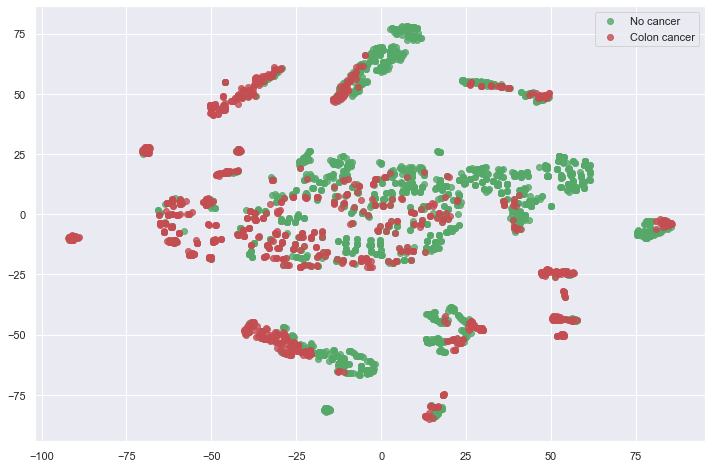

In [203]:
tsne_plot(X_train[cont_vars],  y_train)

# 8. Feature Selection

In [155]:
Predictive_Model(Train_input_df,  y_train, Test_input_df,y_test)

         Current function value: 0.127265
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 3165
Model:                          Logit   Df Residuals:                     3120
Method:                           MLE   Df Model:                           44
Date:                Tue, 29 Sep 2020   Pseudo R-squ.:                  0.8077
Time:                        05:34:43   Log-Likelihood:                -402.79
converged:                      False   LL-Null:                       -2094.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                      -1705.3127    111.482    -15.297     

In [178]:
removed_list = ['Brand_Mercedes-Benz','Brand_Mitsubishi','Model_categorical_grouped_CClass','Model_categorical_grouped_Corolla','Model_categorical_grouped_EClass','Model_categorical_grouped_Jetta',
'Model_categorical_grouped_Lancer','Model_categorical_grouped_LancerX','Model_categorical_grouped_ML','Model_categorical_grouped_Missing','Model_categorical_grouped_TTransporter']

cat_vars = [var for var in cat_df.columns if var not in removed_list]
print(cat_vars)

['Brand_BMW', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen', 'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol', 'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van', 'Registration_yes', 'Model_categorical_grouped_Caddy', 'Model_categorical_grouped_Camry', 'Model_categorical_grouped_Kangoo', 'Model_categorical_grouped_LandCruiser', 'Model_categorical_grouped_LandCruiserPrado', 'Model_categorical_grouped_Megane', 'Model_categorical_grouped_PajeroWagon', 'Model_categorical_grouped_PassatB', 'Model_categorical_grouped_Polo', 'Model_categorical_grouped_Q', 'Model_categorical_grouped_Rav', 'Model_categorical_grouped_S', 'Model_categorical_grouped_Touareg', 'Model_categorical_grouped_Trafic', 'Model_categorical_grouped_Vito', 'Model_categorical_grouped_X', 'Model_categorical_grouped_rare']


# 9. Final model

In [179]:
cat_df = cat_df[cat_vars]

Predictive_Model(num_df, cat_df, target)

         Current function value: 0.164766
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 2964
Model:                          Logit   Df Residuals:                     2930
Method:                           MLE   Df Model:                           33
Date:                Tue, 22 Sep 2020   Pseudo R-squ.:                  0.7511
Time:                        14:07:46   Log-Likelihood:                -488.36
converged:                      False   LL-Null:                       -1962.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -3.1230   1326.547     -0.002     

# 10. Model Interpretation

# 11. Model Evalution & Testing

# 12. Tuning Model

# Model Selection 